In [149]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))
import torch
import numpy as np
import utils
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%load_ext autoreload
np.random.seed(2) 
torch.manual_seed(2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [229]:
%autoreload

In [151]:
lcs = utils.get_data('../../datasets/ZTF_gr', test_split=0.5)
net,optimizer,scheduler,lrs,args,epoch,losses = utils.load_checkpoint('../checkpoints/exp_29/ZTF_gr1.1562741994857788.h5', lcs.data_obj)


found 3407 for band='r'
found 3408 for band='g'



KeyboardInterrupt



In [268]:
ex = 1214
num_sims = 100
plt.rcParams['figure.figsize'] = (20,4)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.markersize'] = 10
plt.rcParams['scatter.marker'] = '.'

100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.38it/s]
/var/folders/f7/kj3k_2wx32z5vc93mdwsypn00000gn/T/ipykernel_67855/1816665373.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(2)
100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.00it/s]


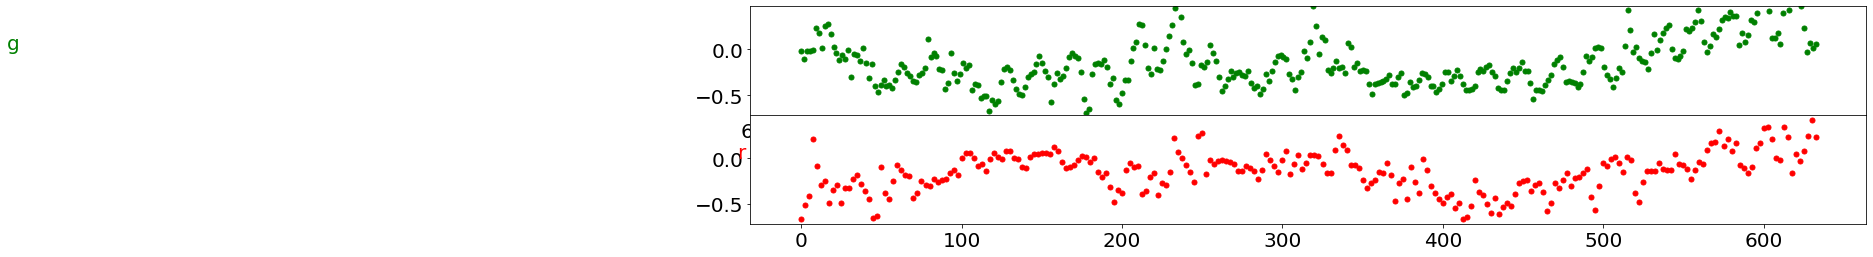

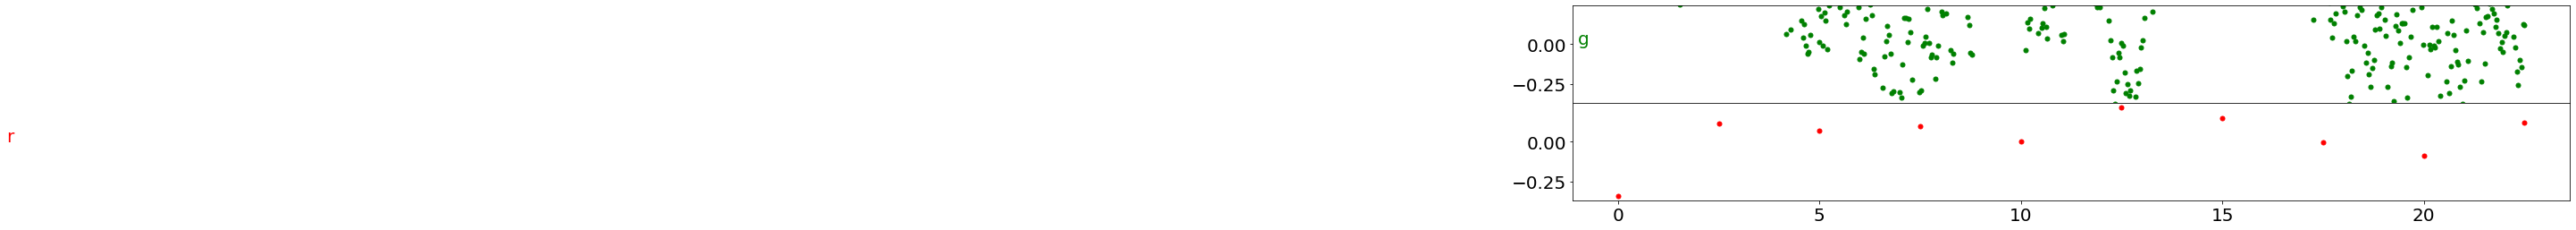

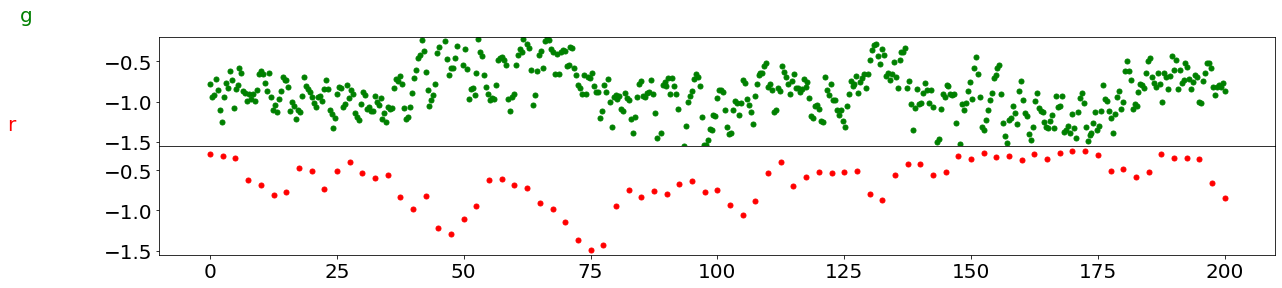

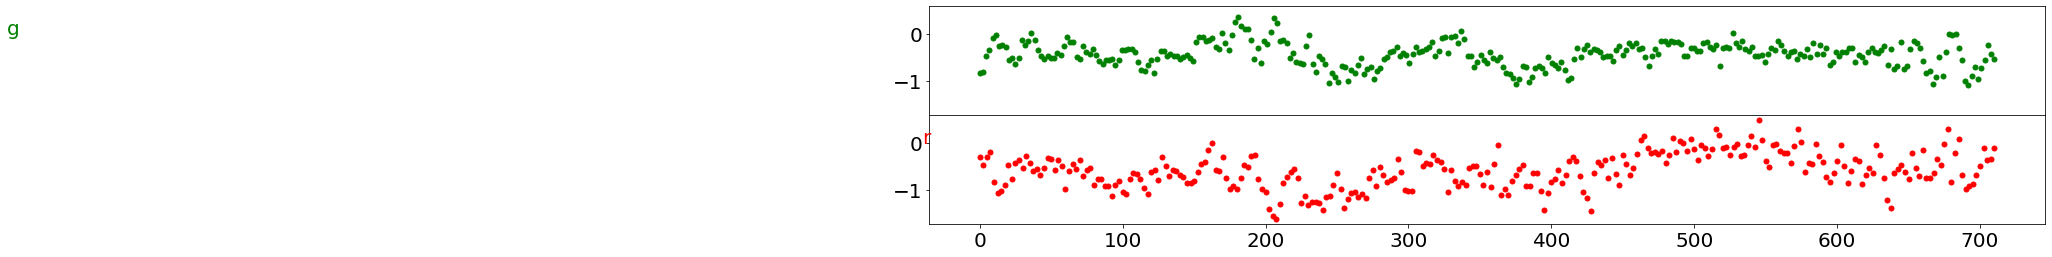

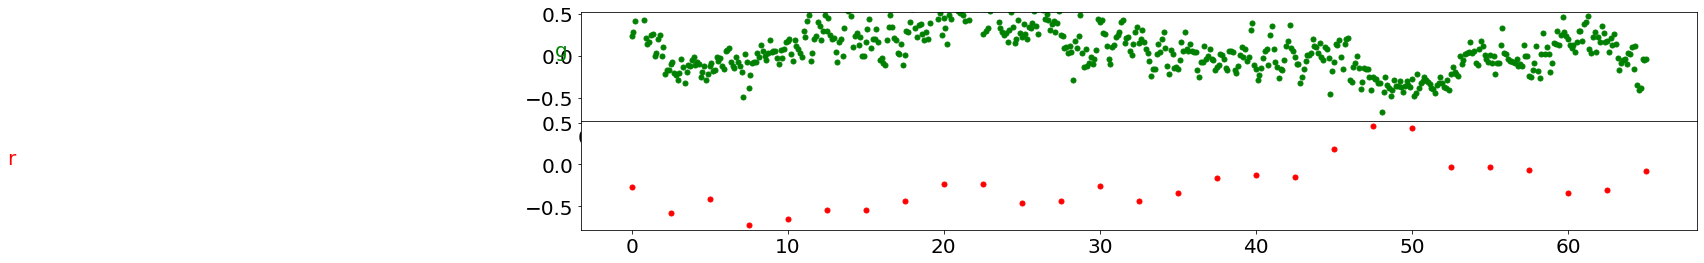

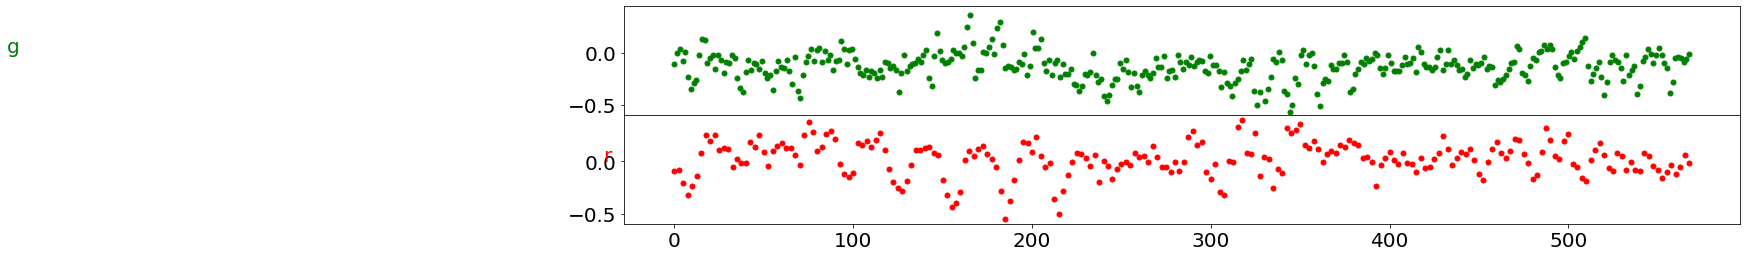

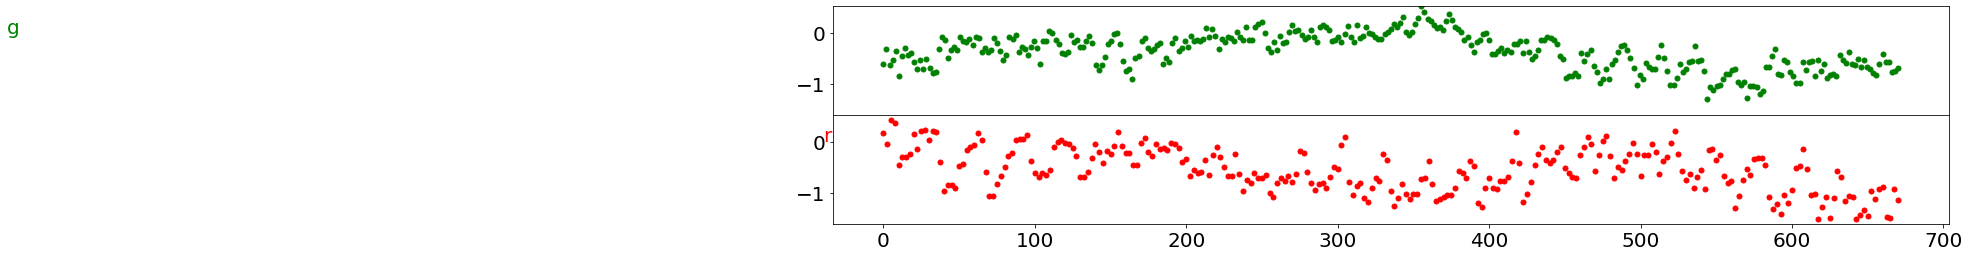

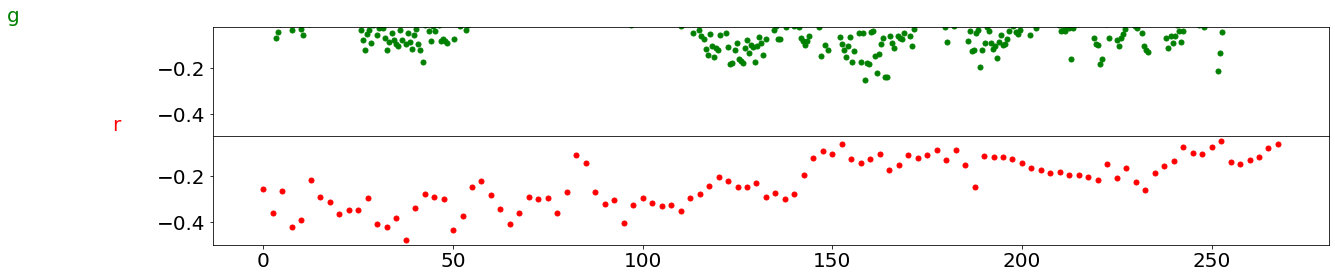

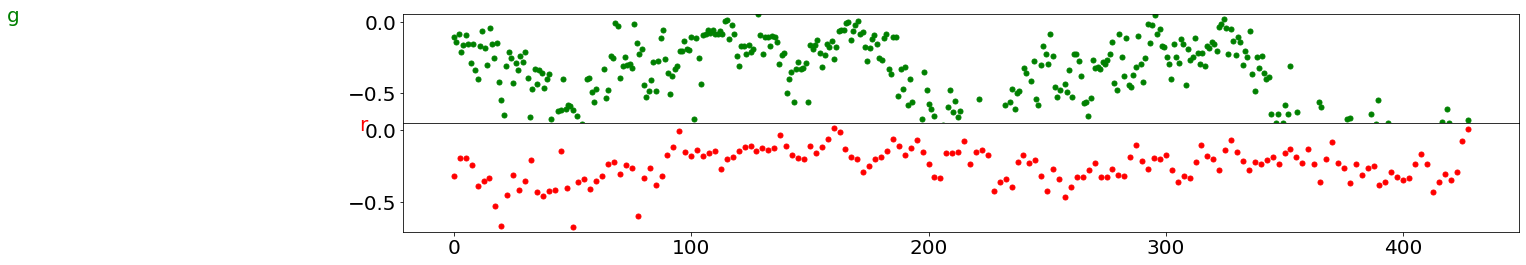

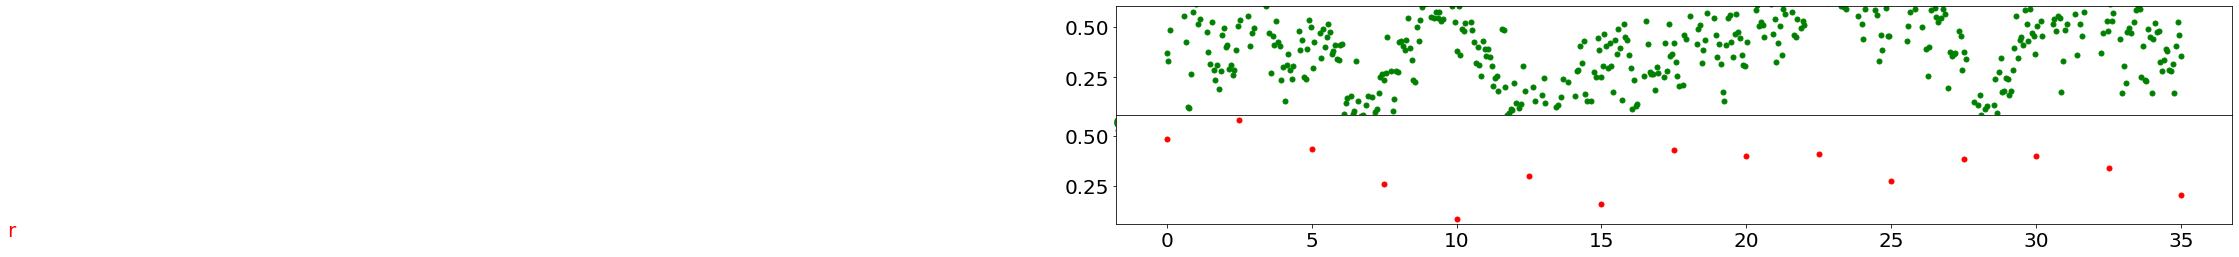

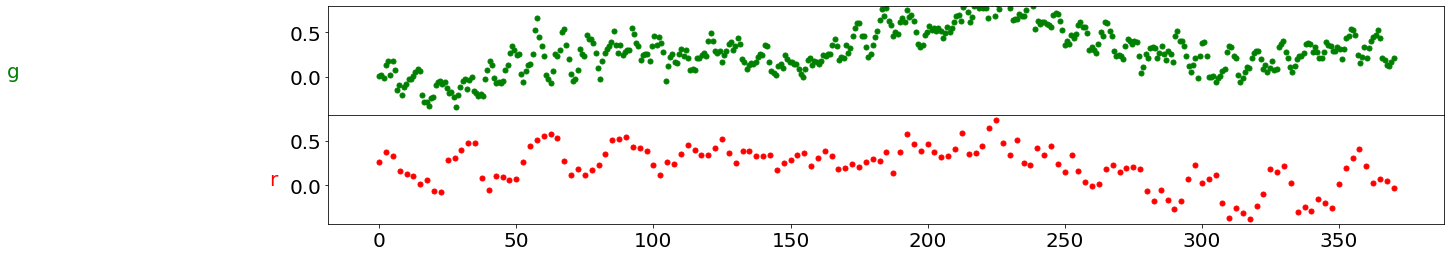

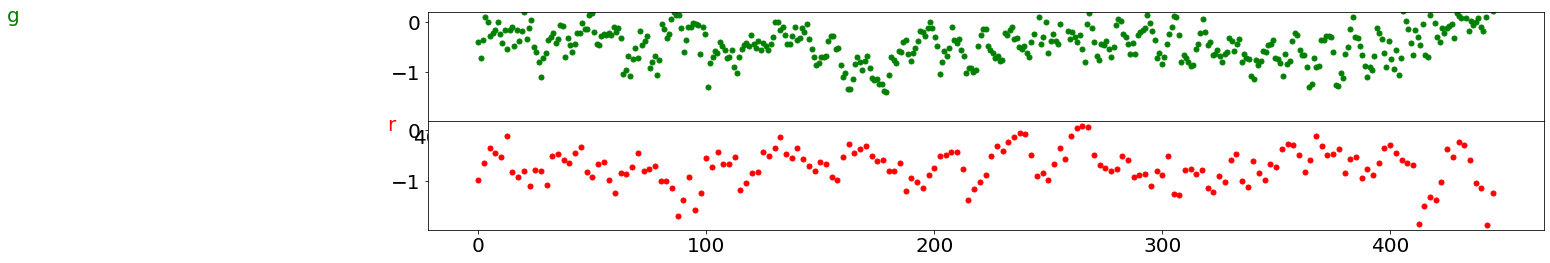

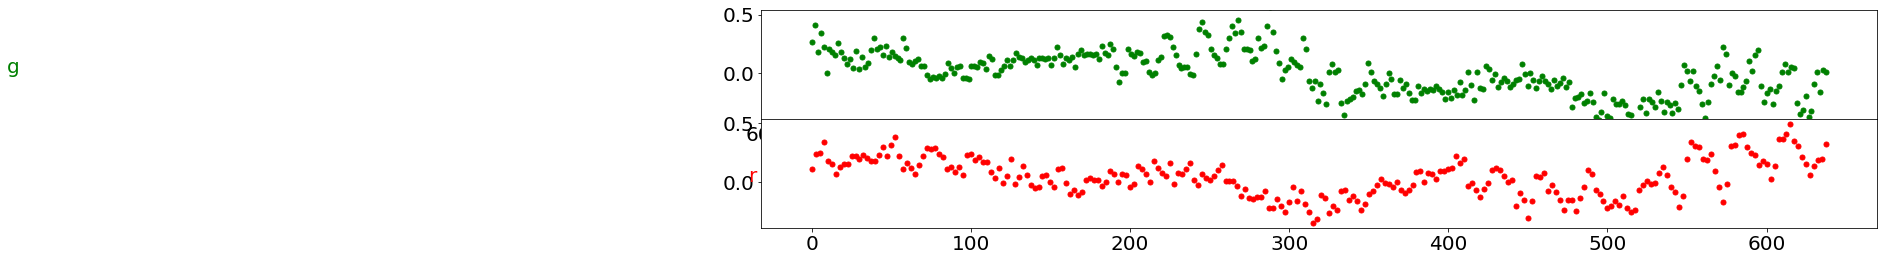

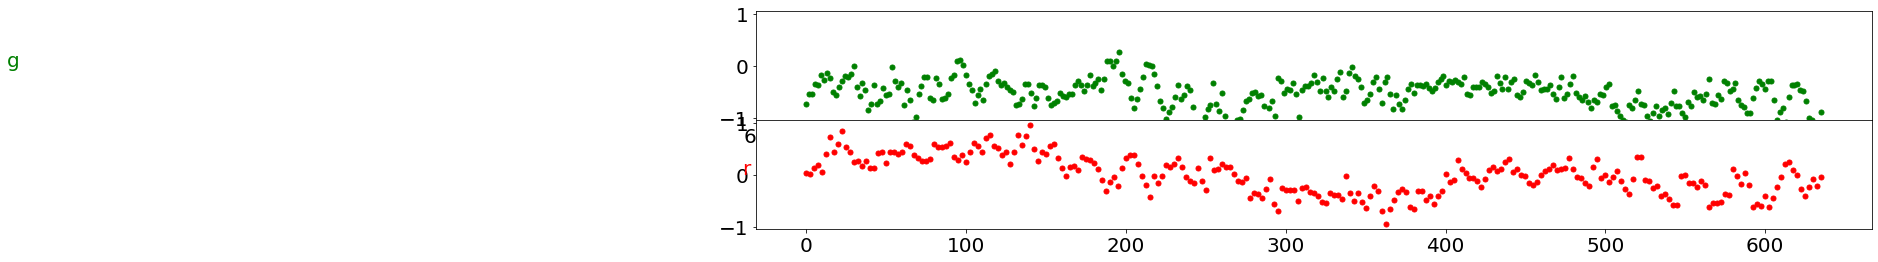

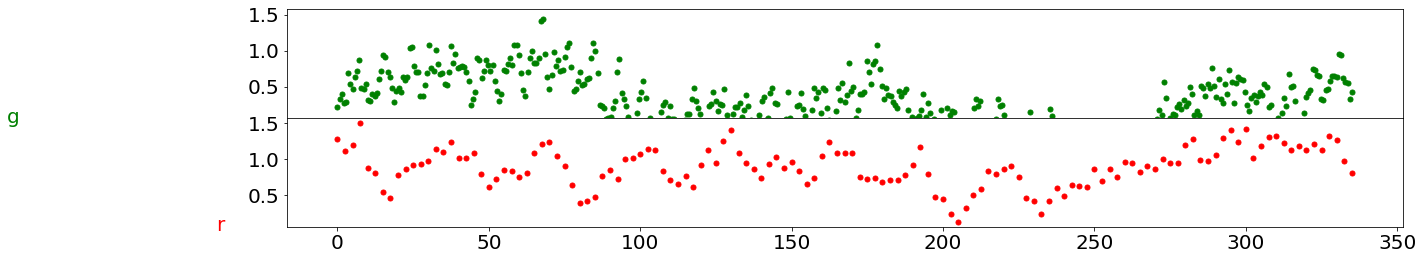

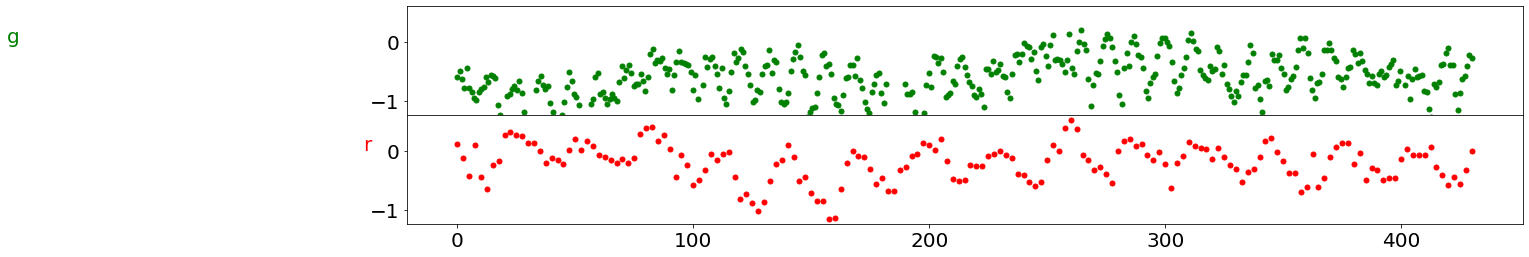

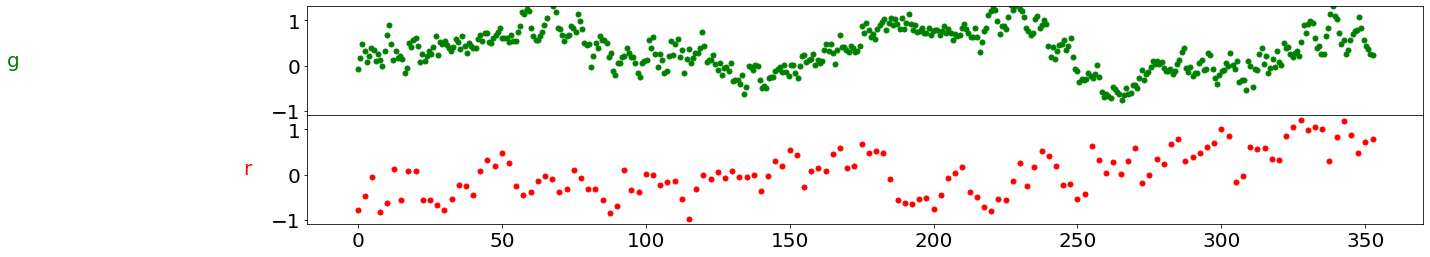

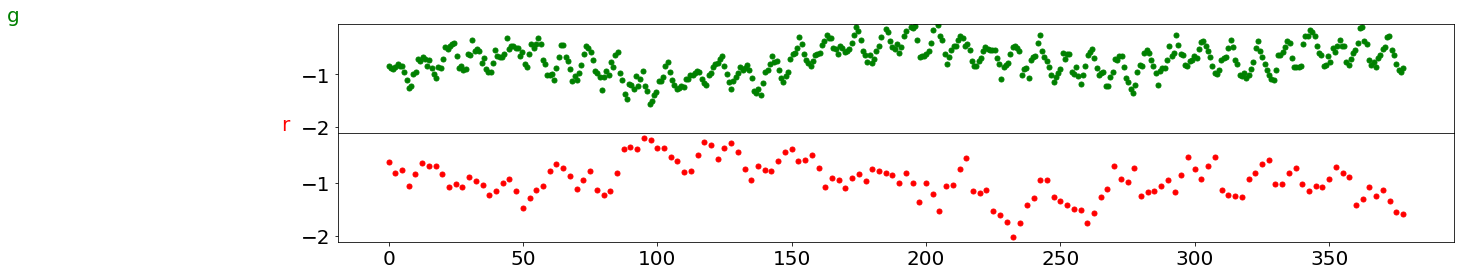

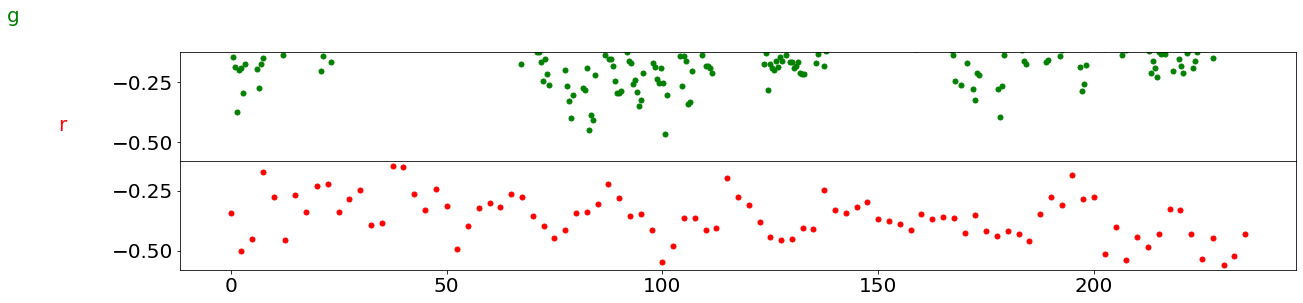

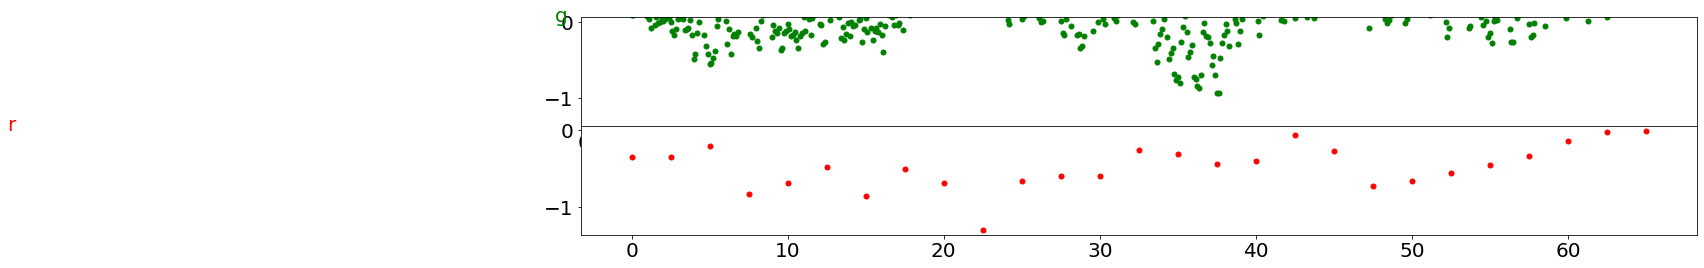

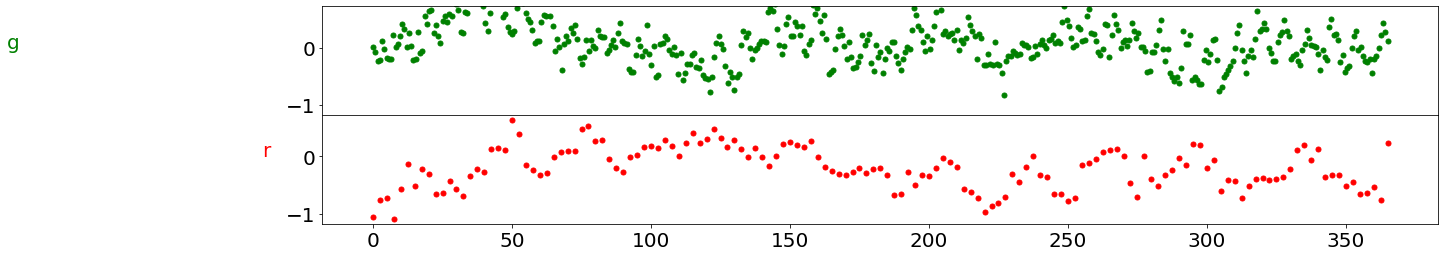

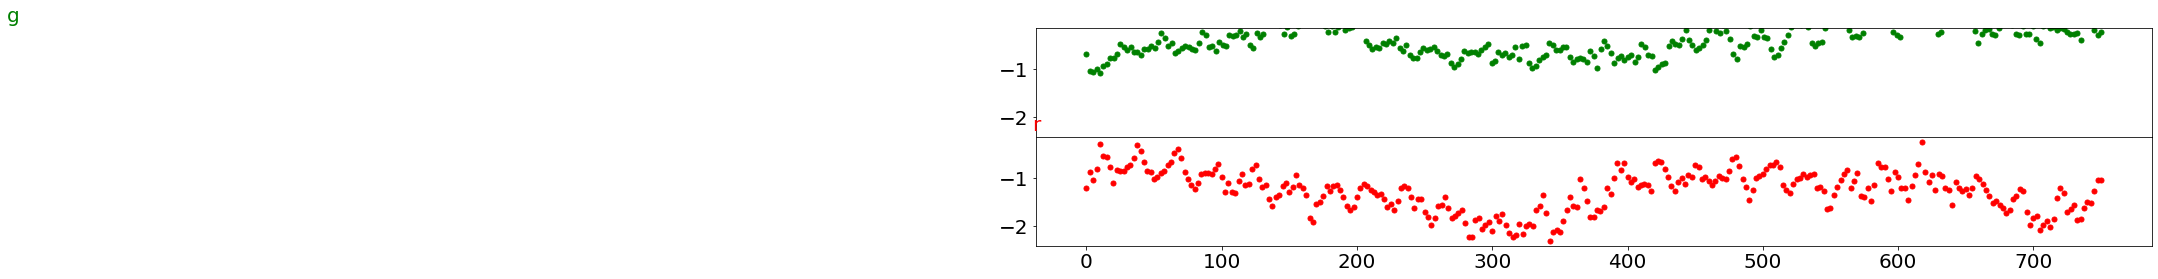

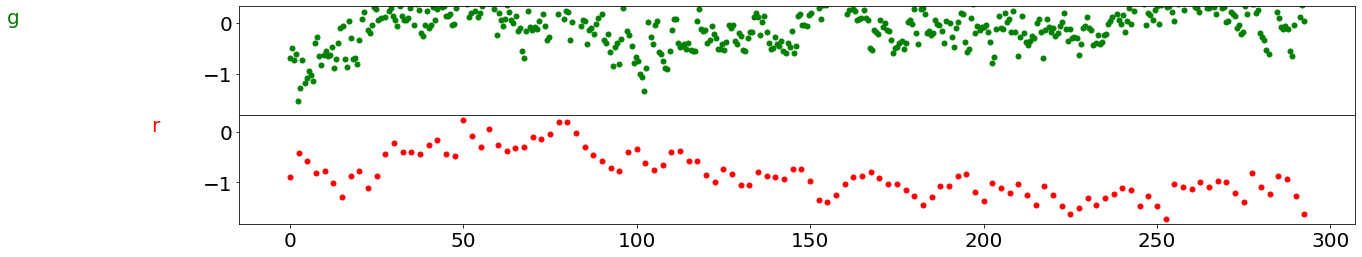

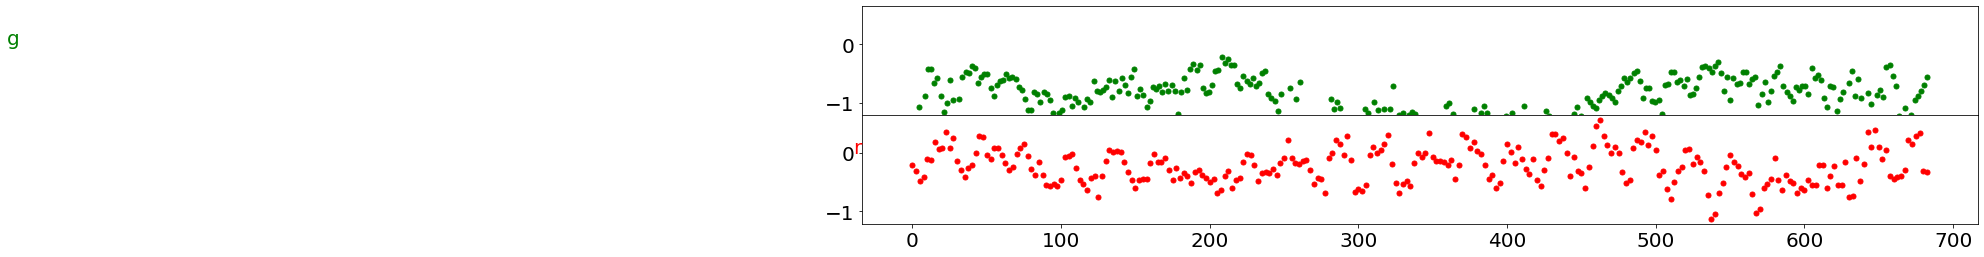

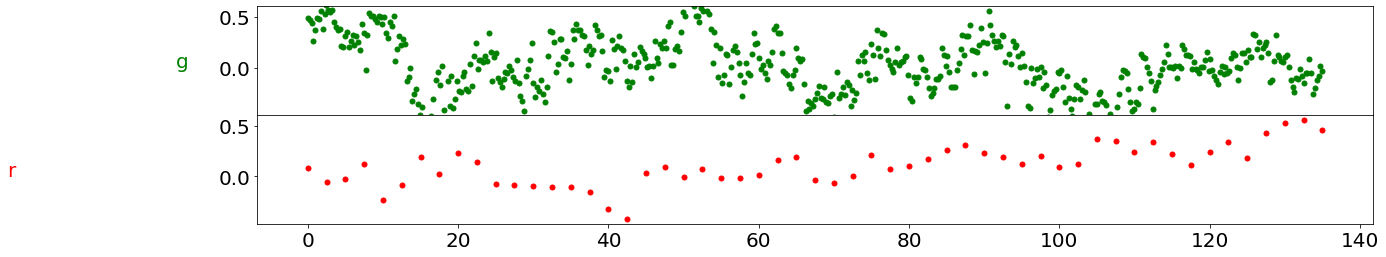

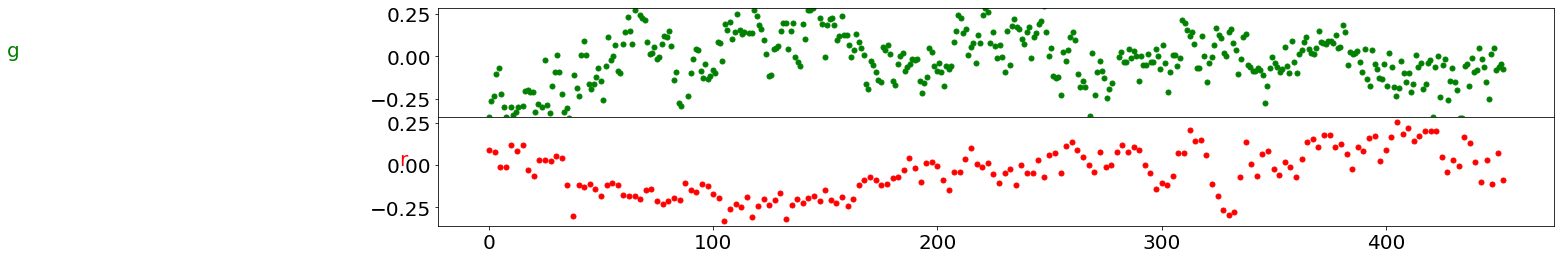

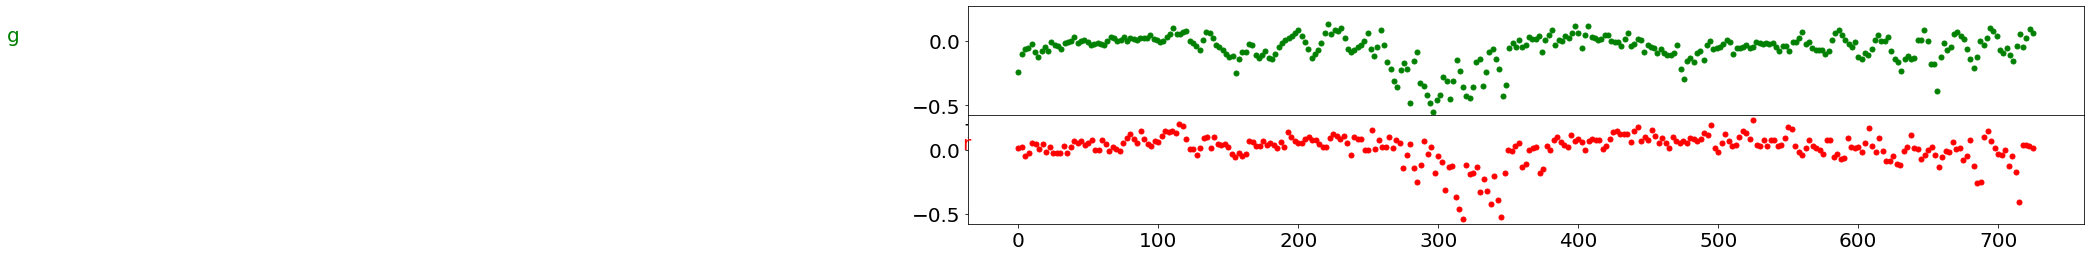

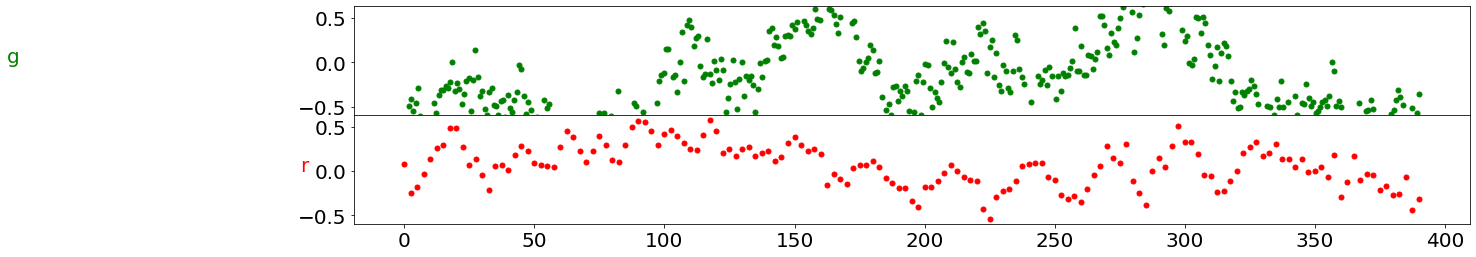

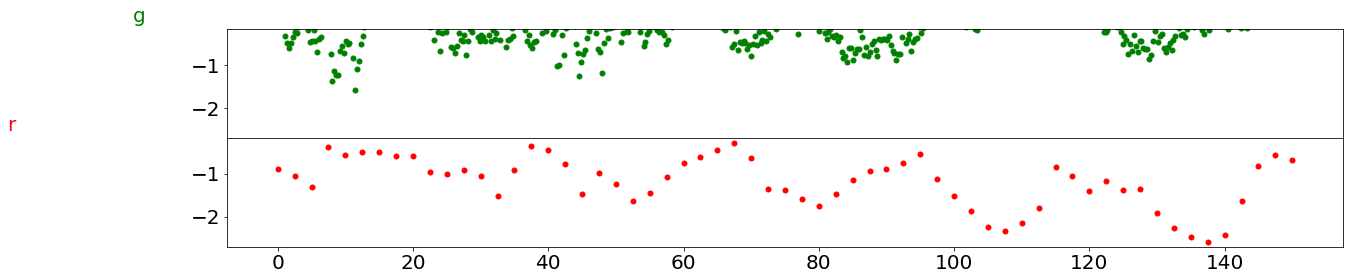

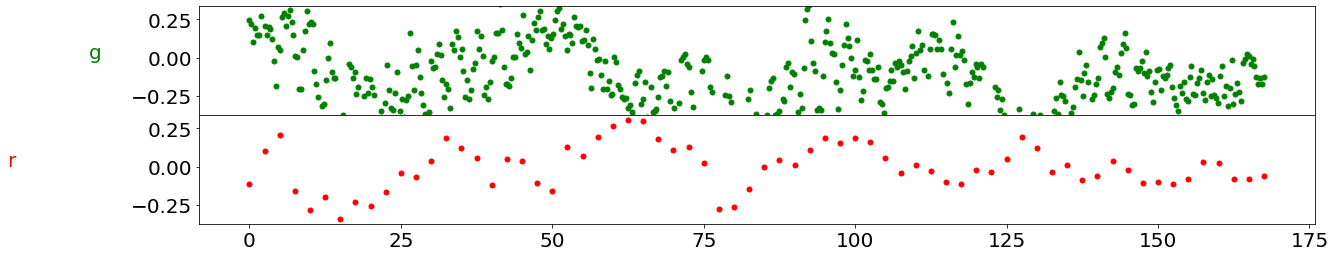

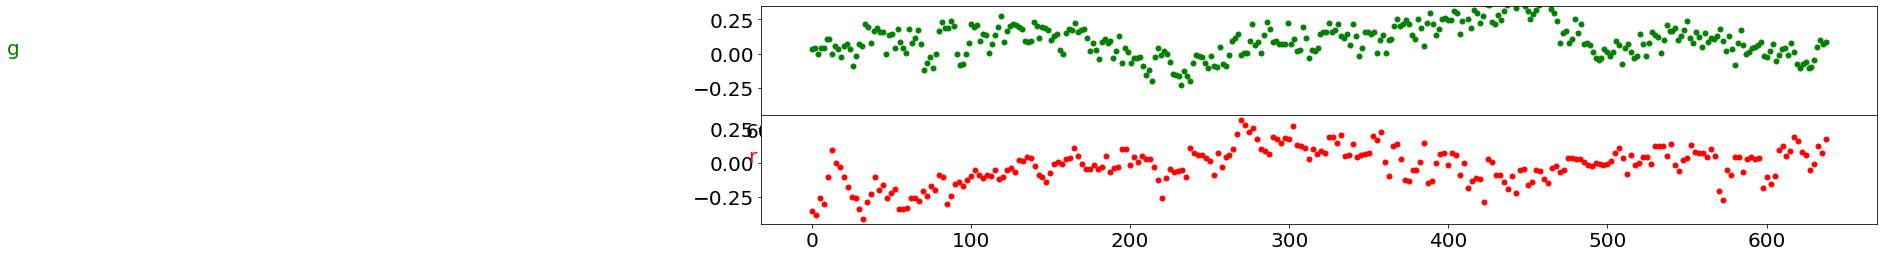

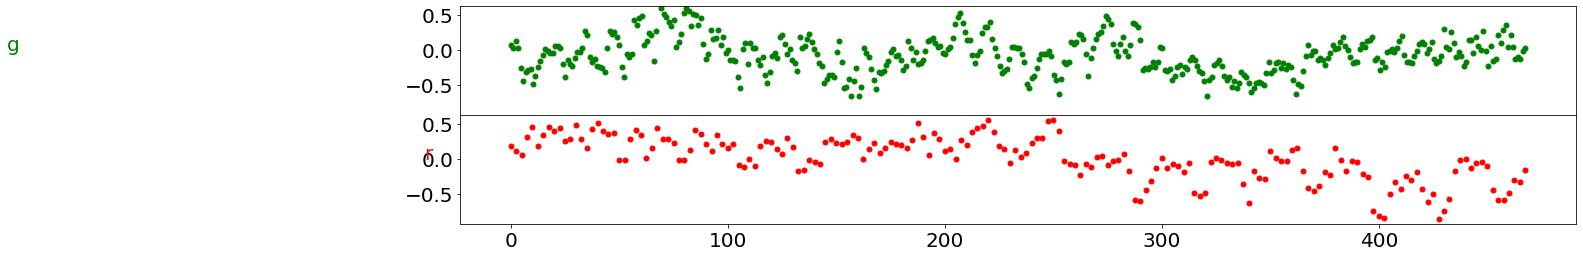

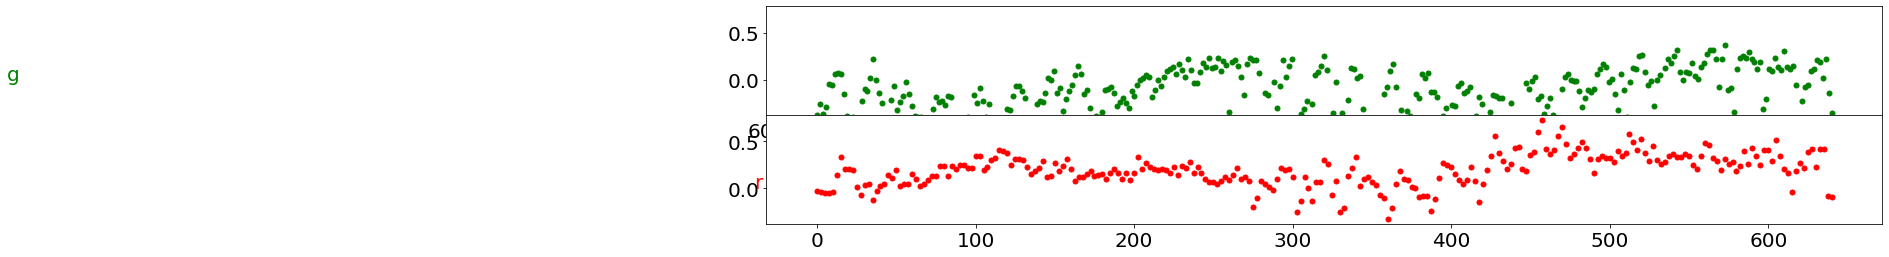

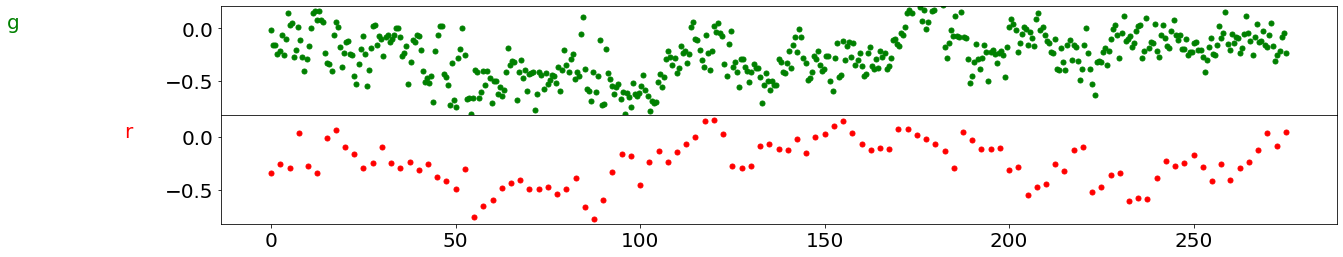

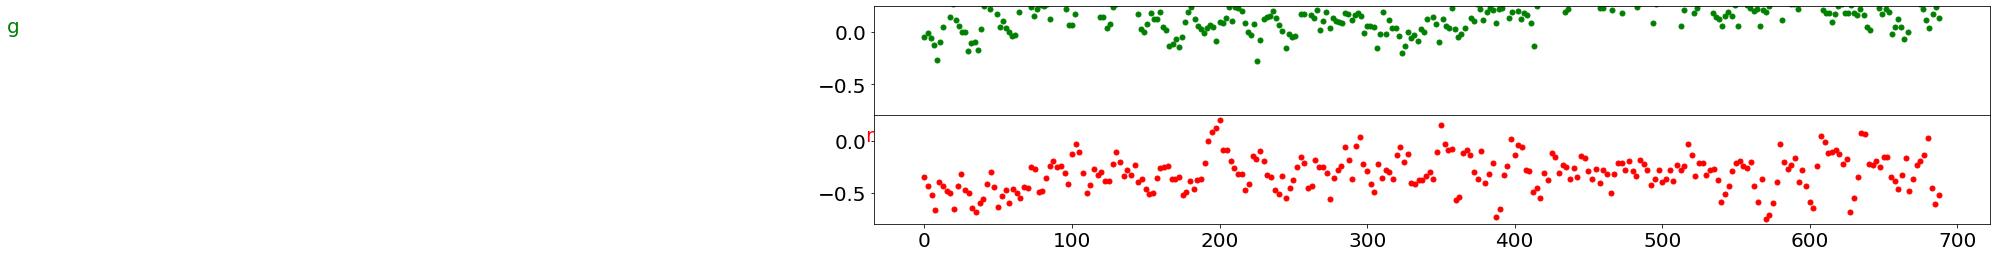

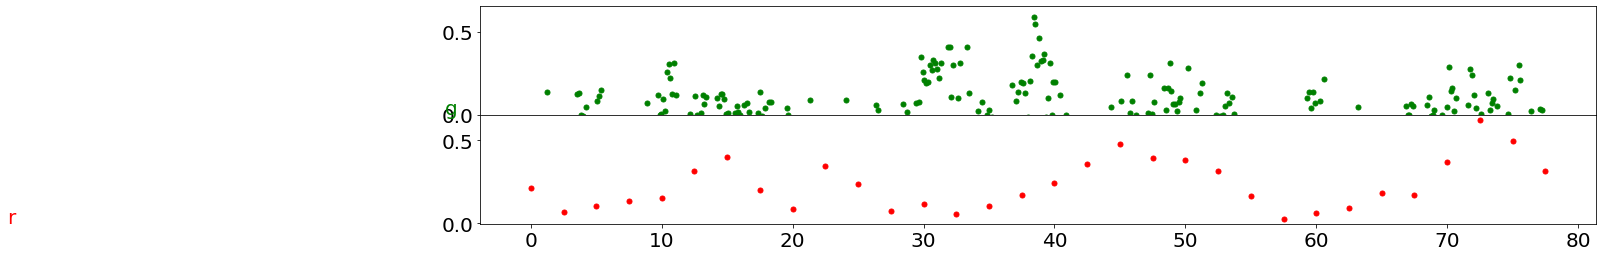

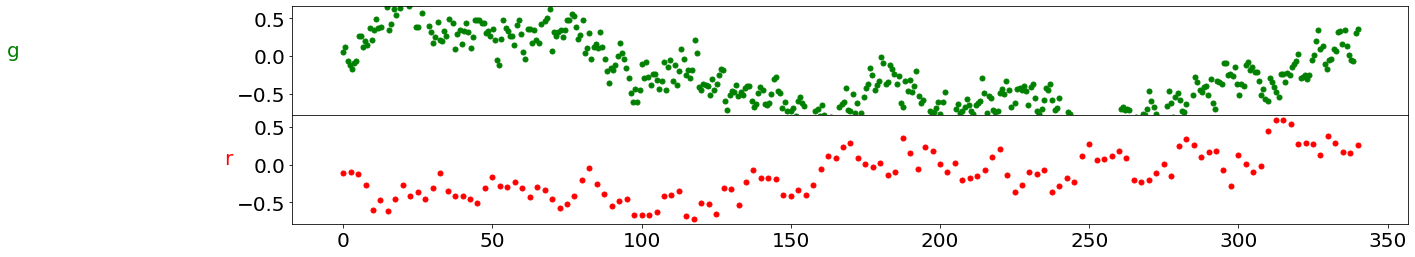

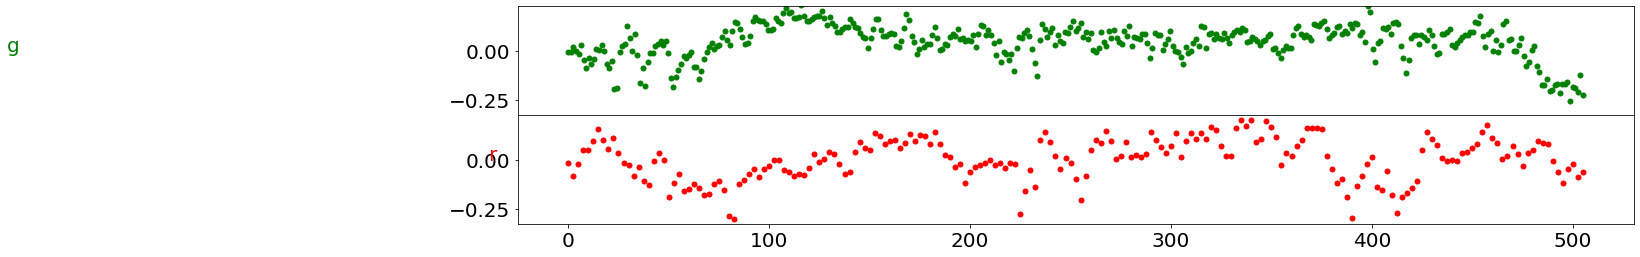

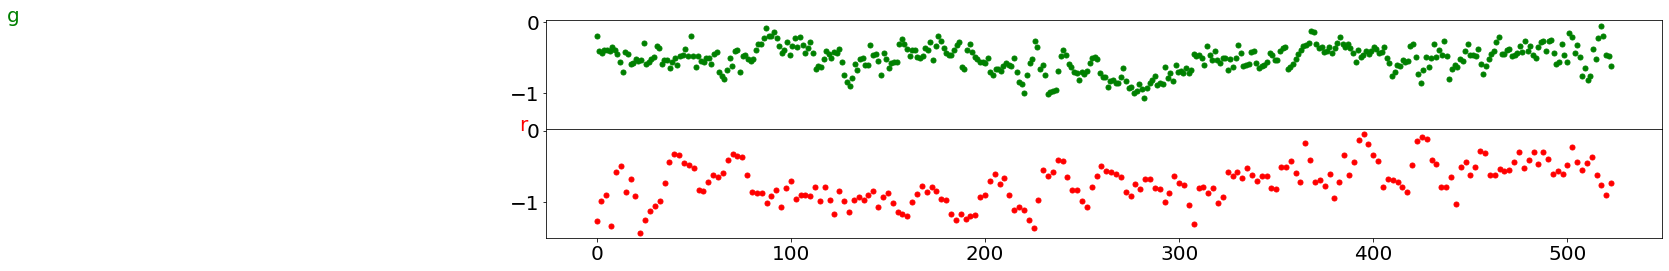

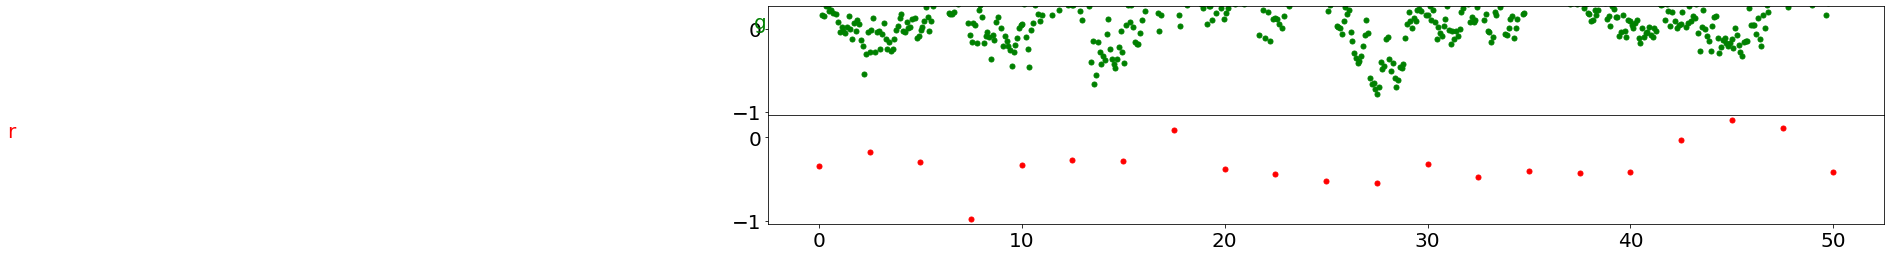

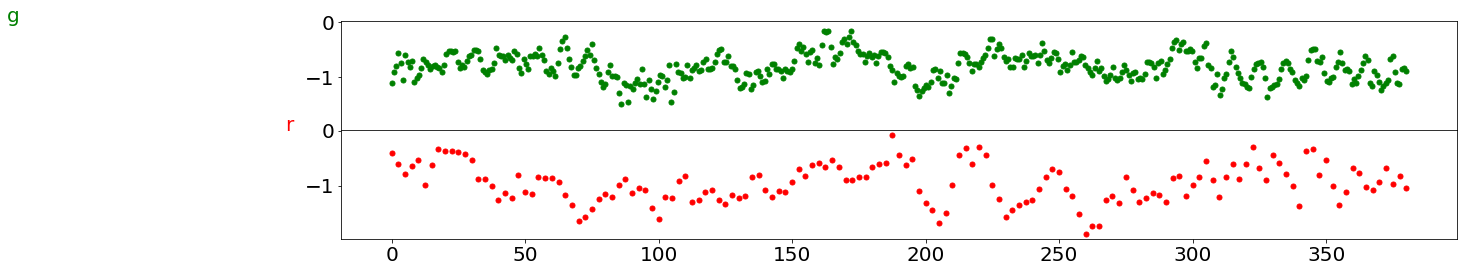

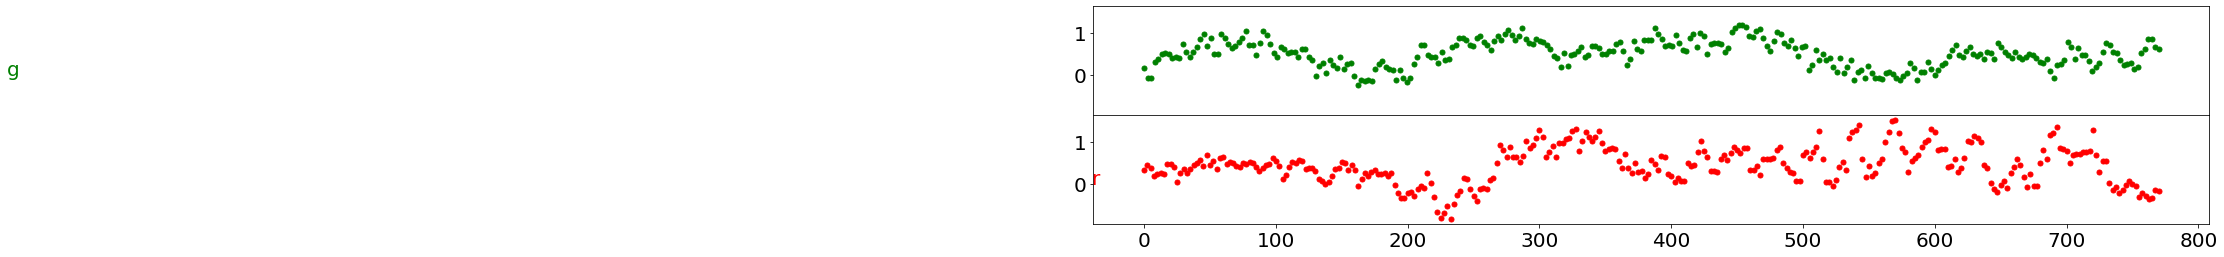

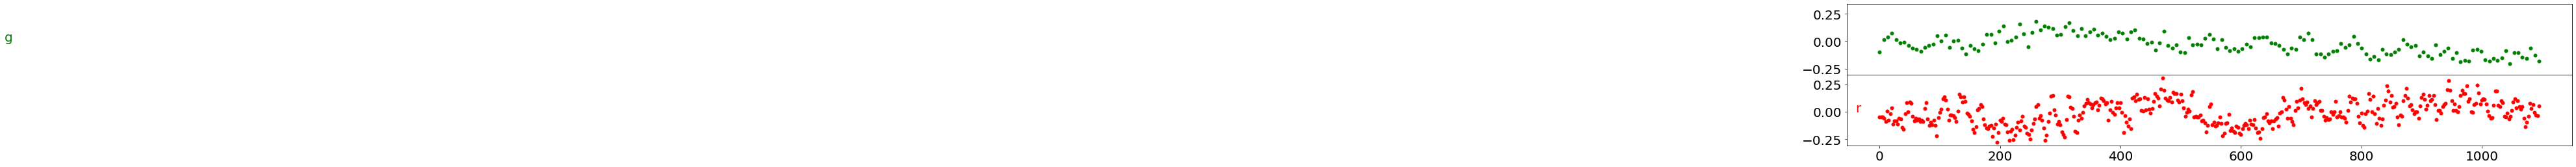

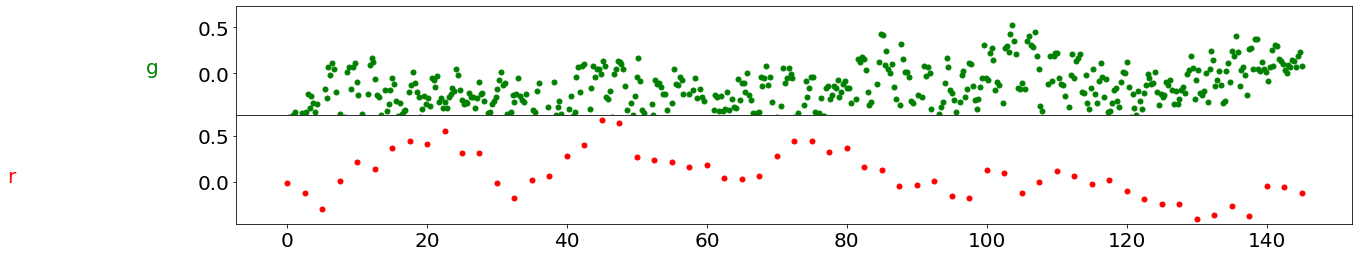

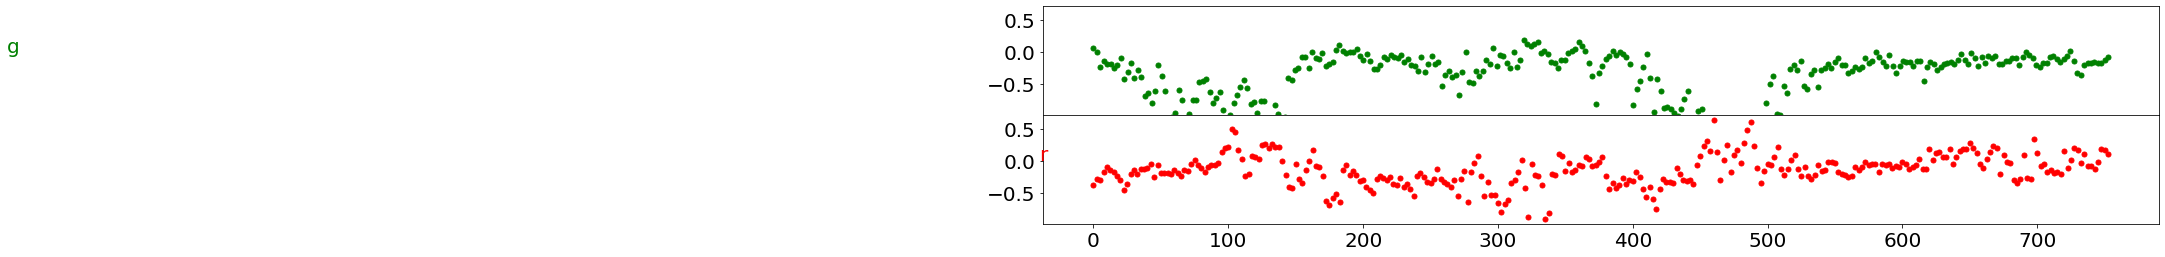

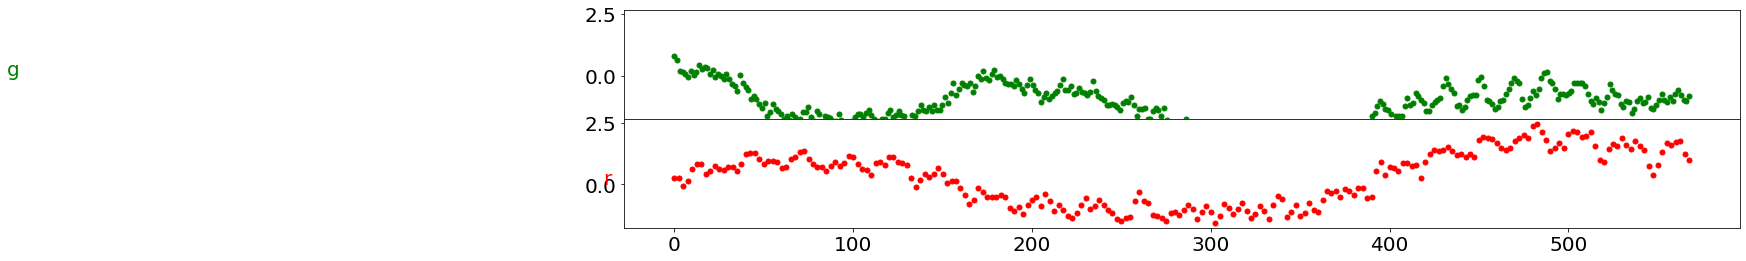

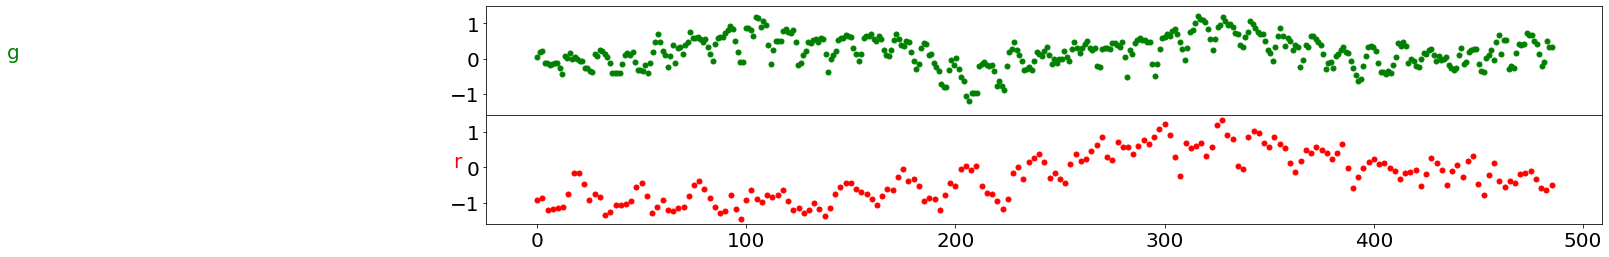

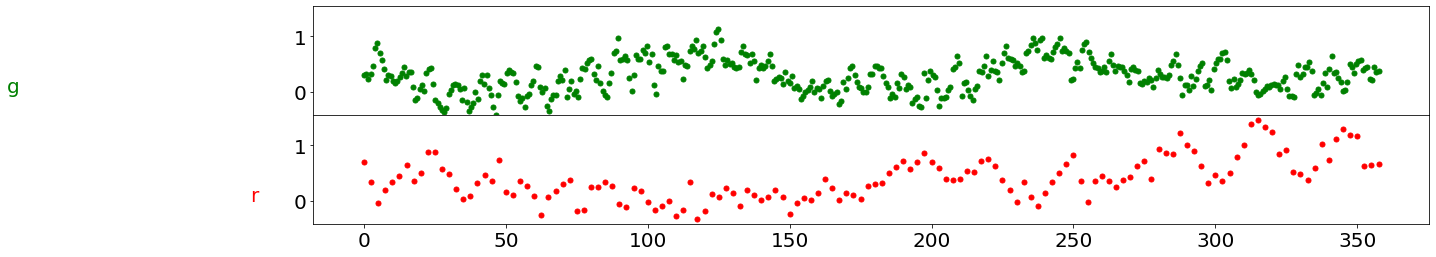

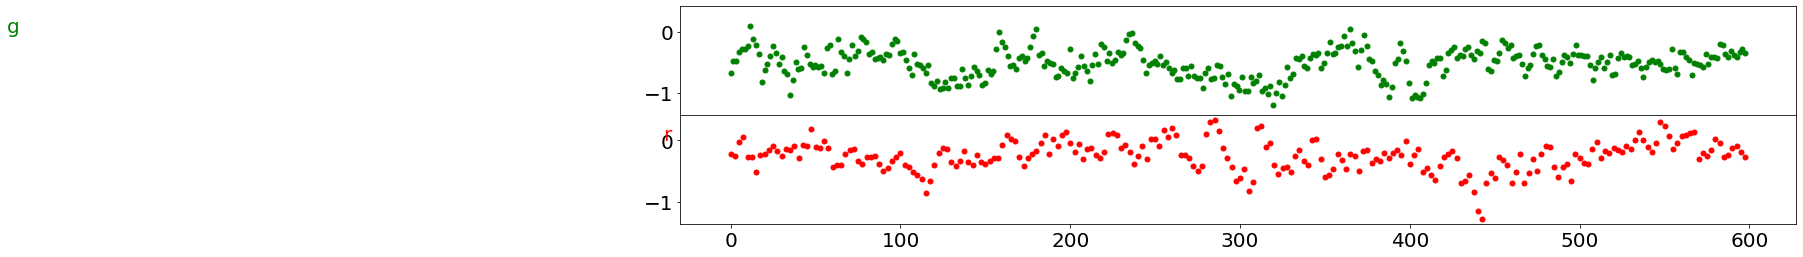

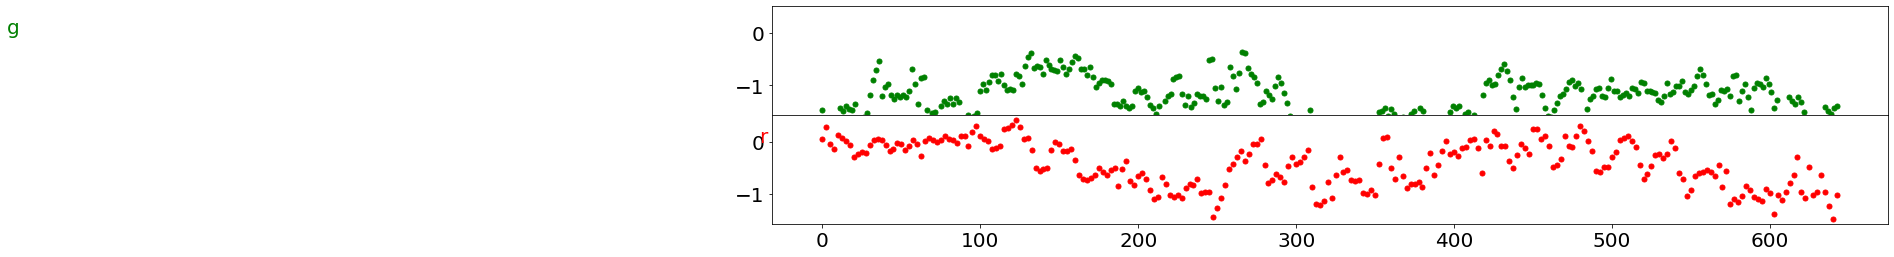

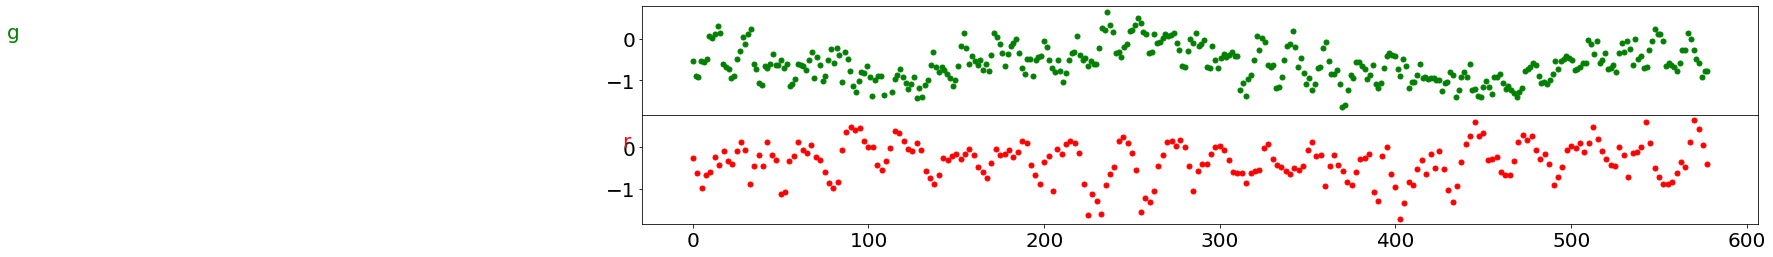

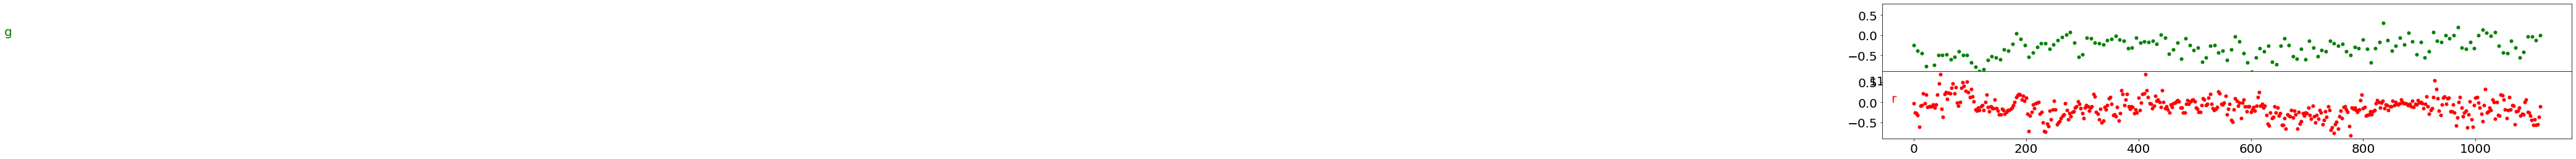

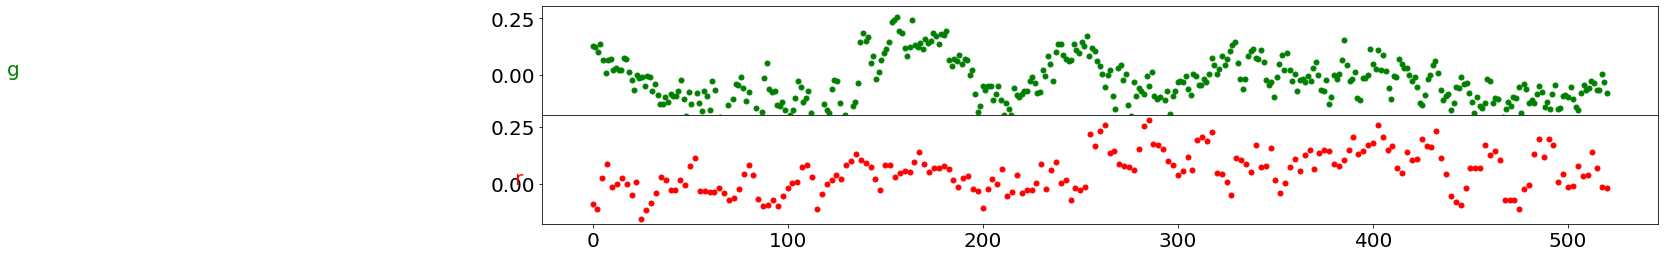

ValueError: Image size of 406390x257 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x288 with 2 Axes>

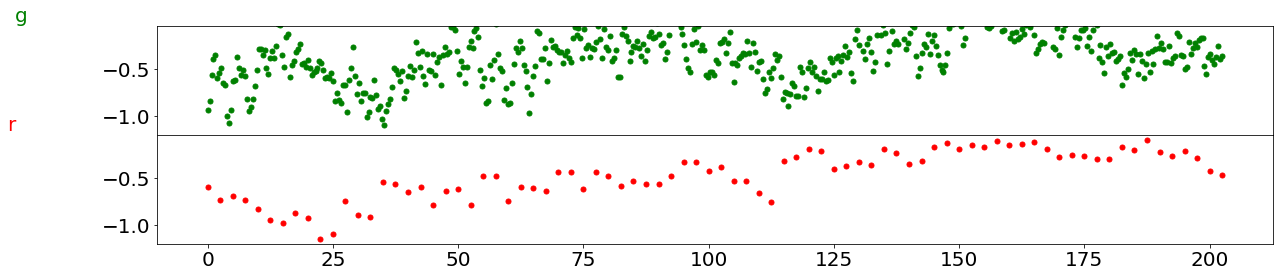

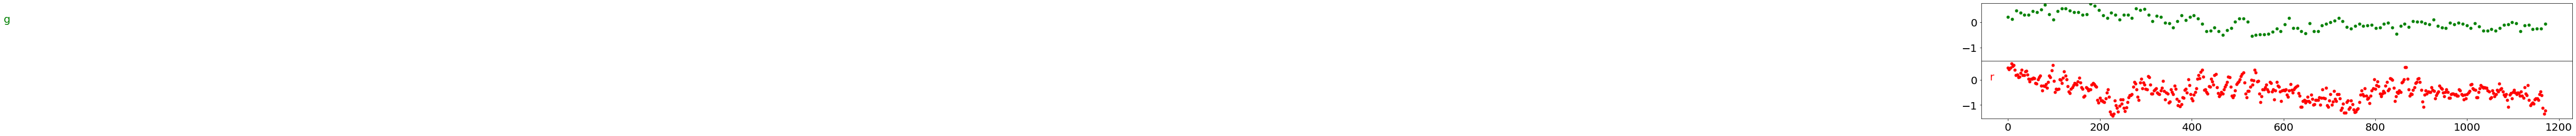

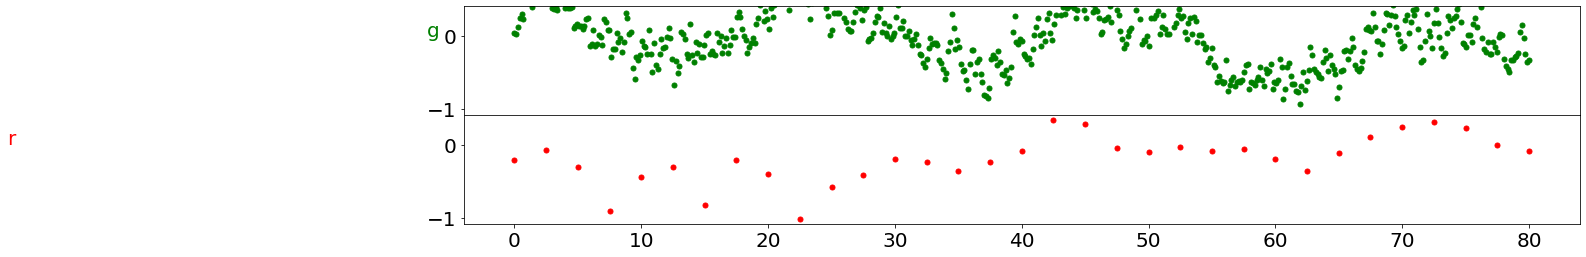

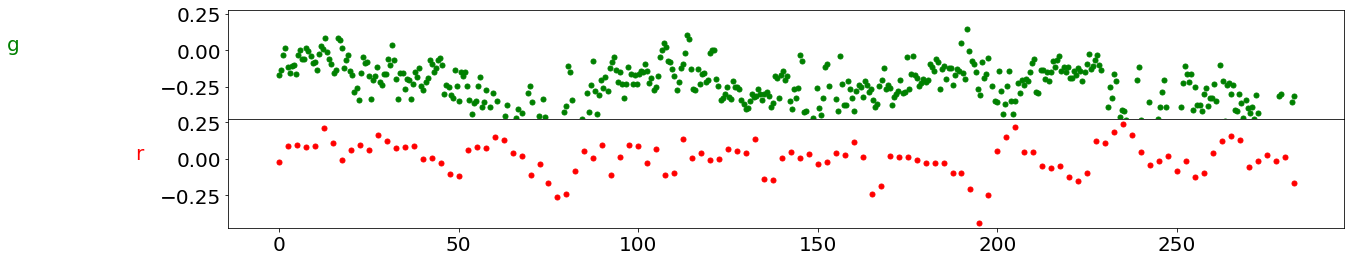

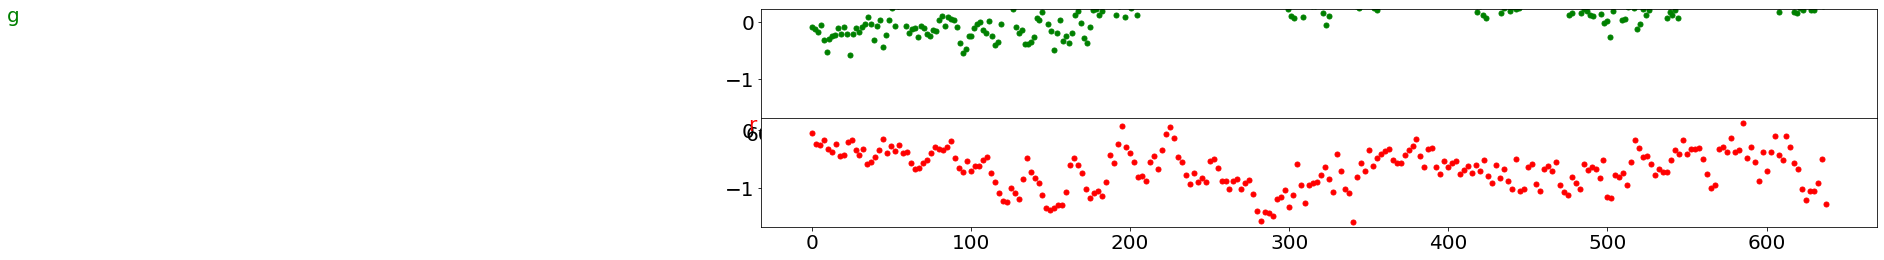

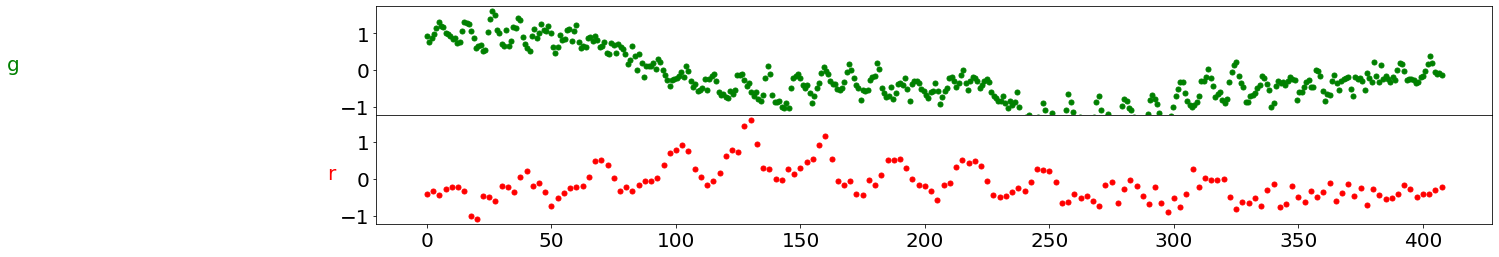

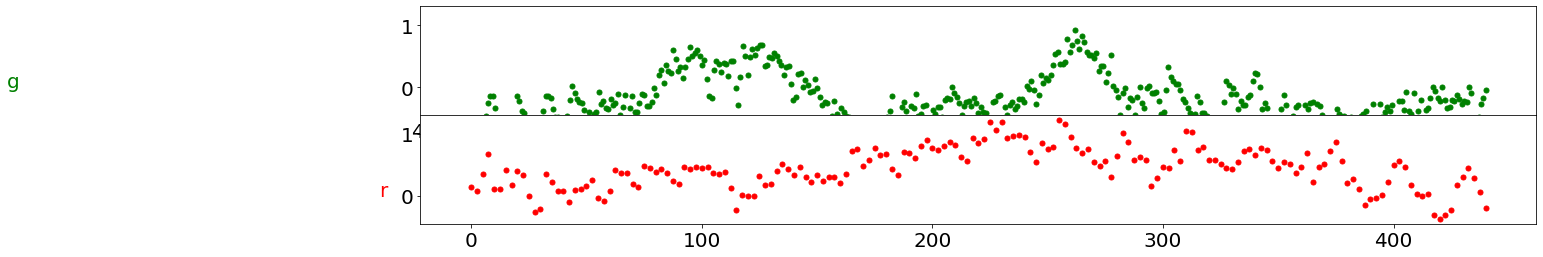

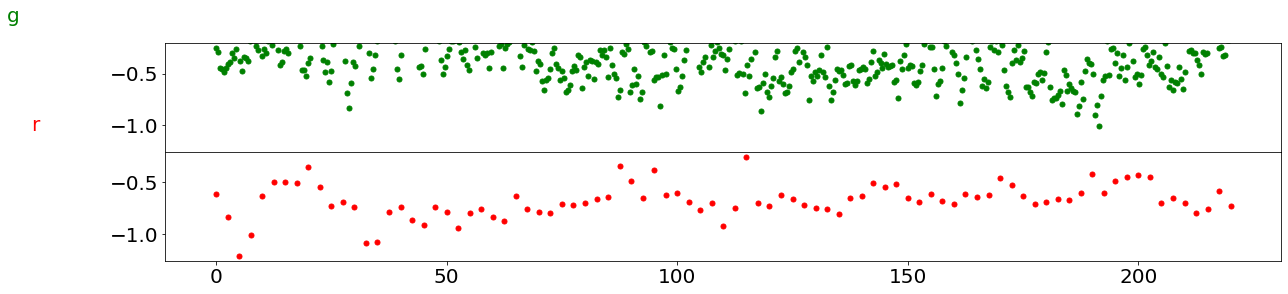

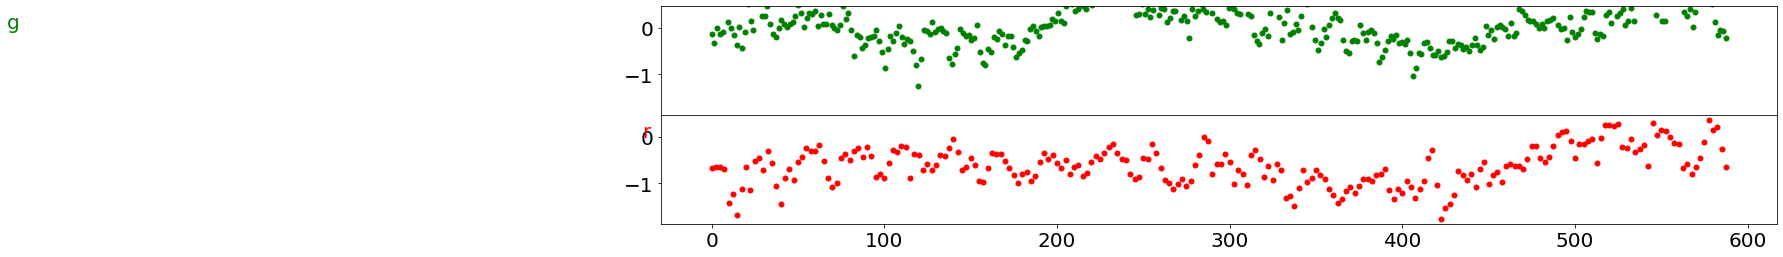

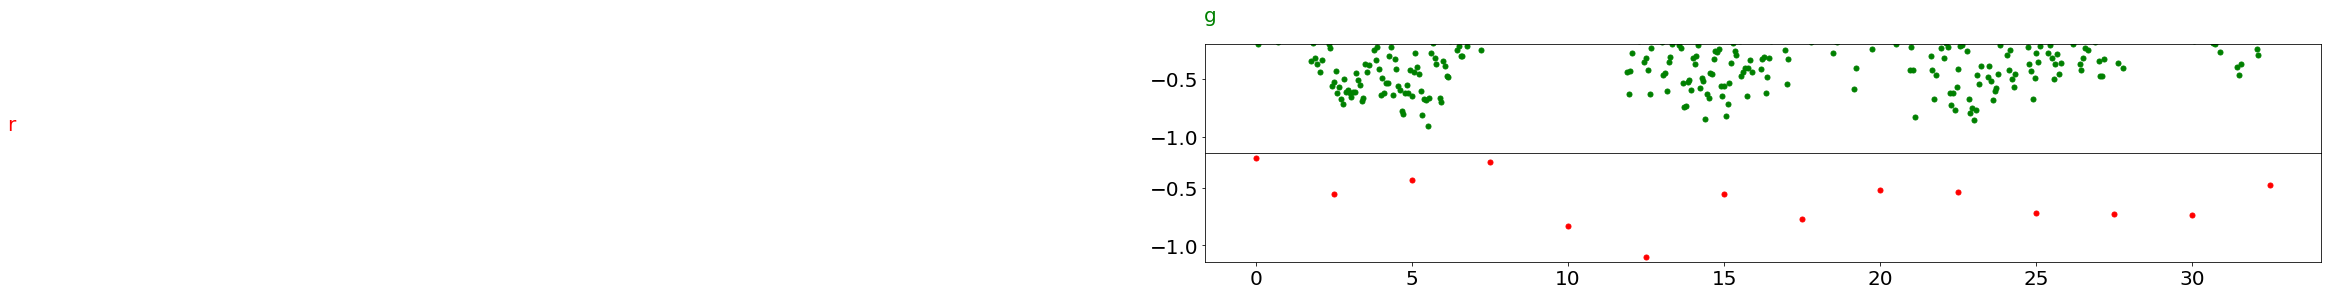

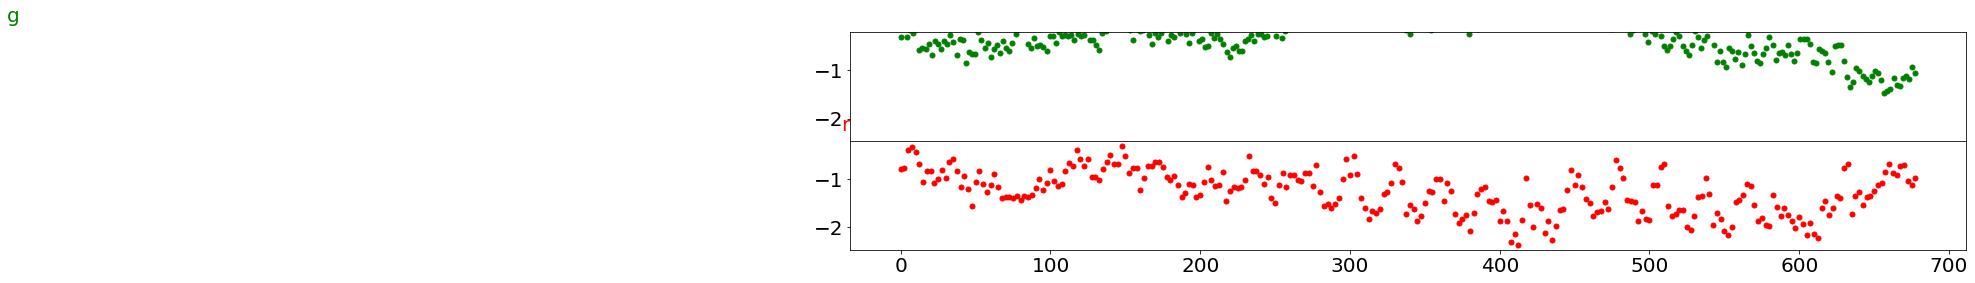

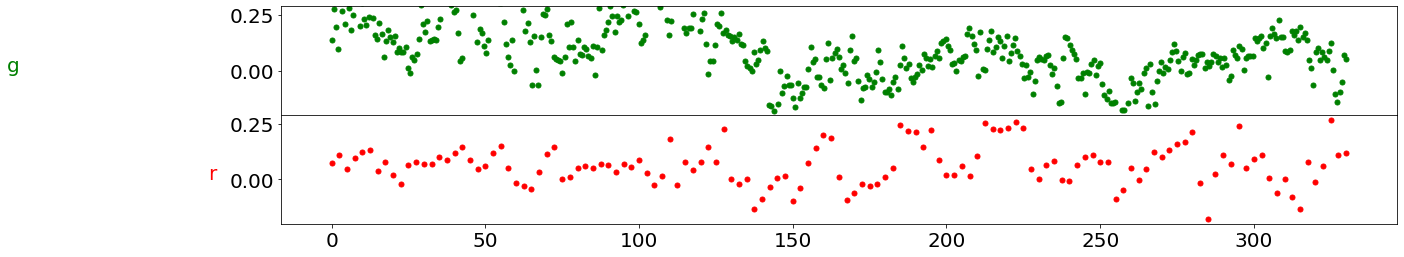

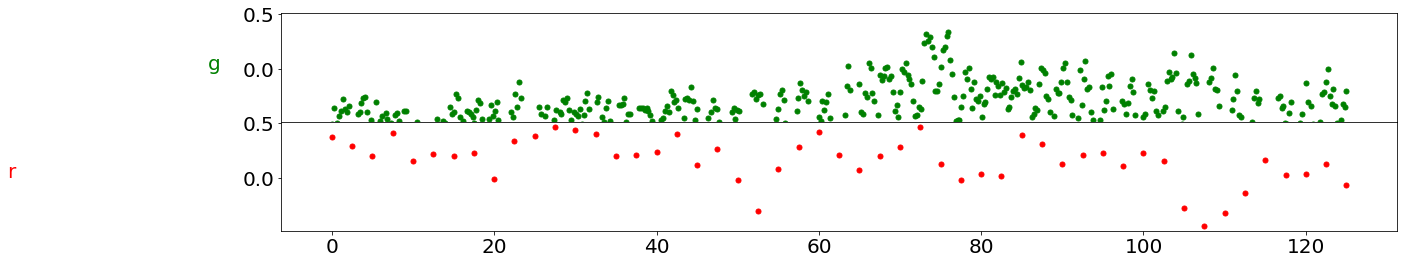

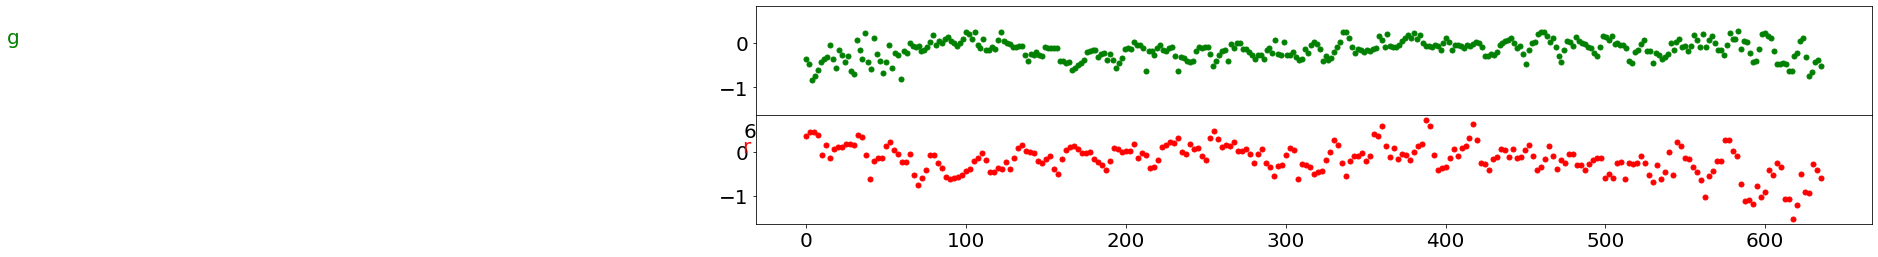

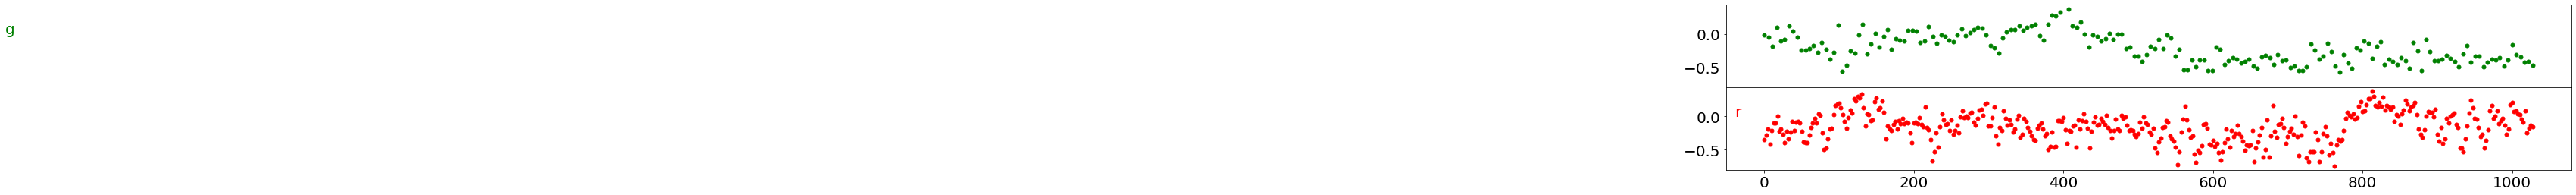

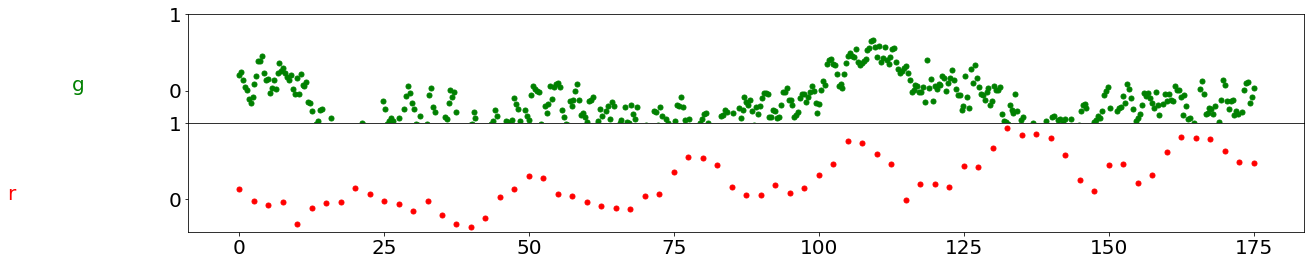

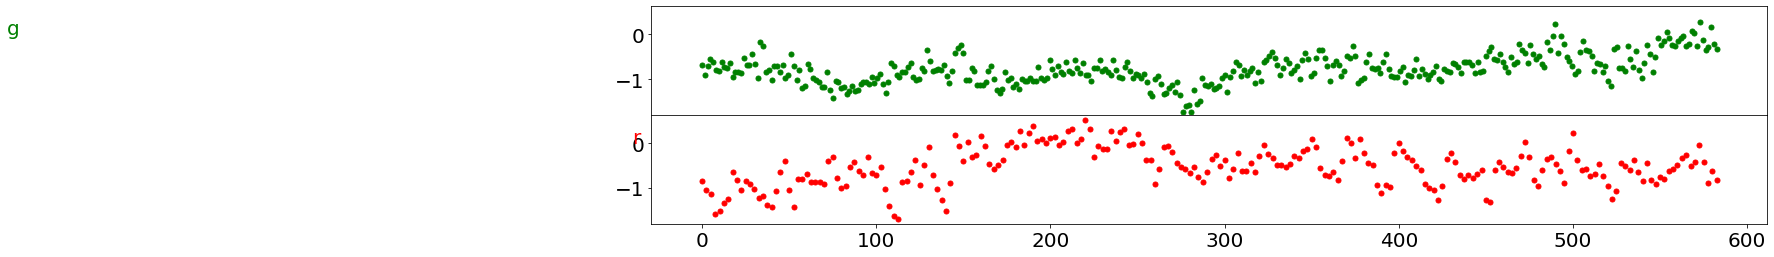

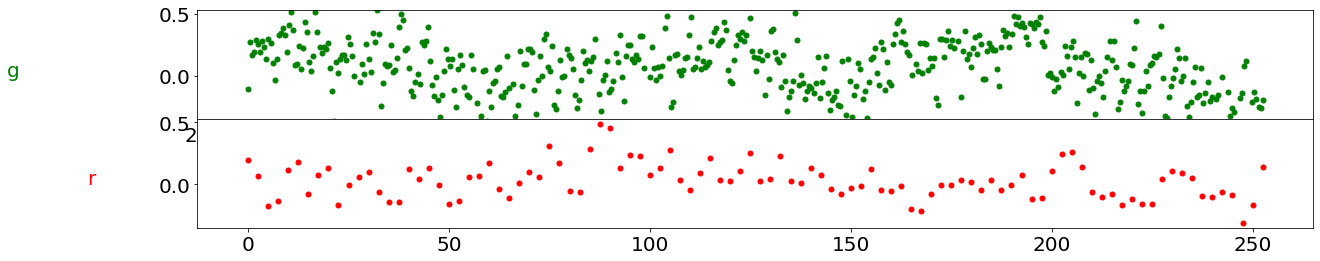

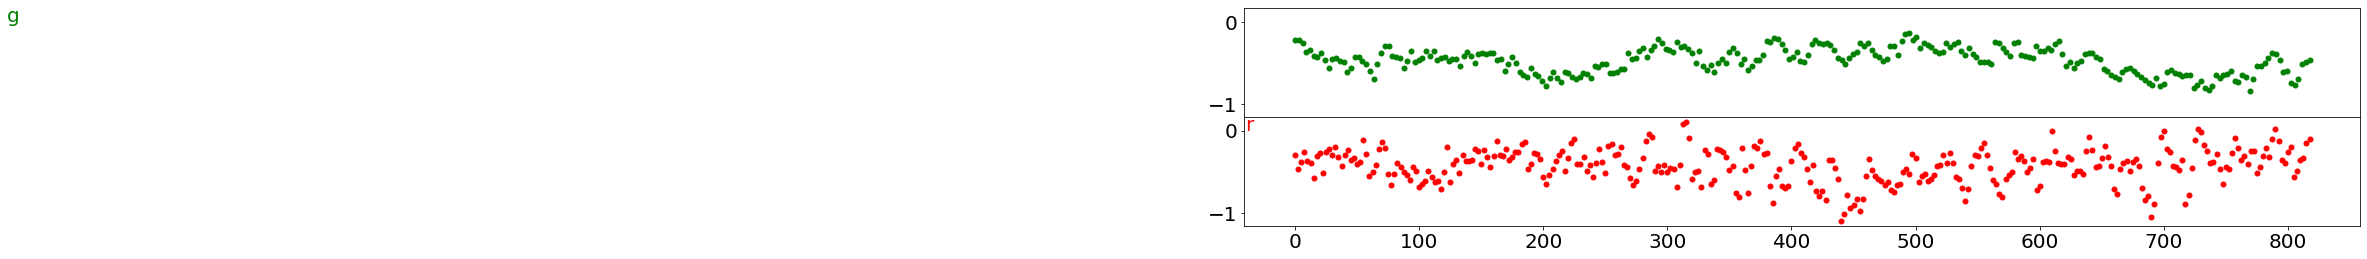

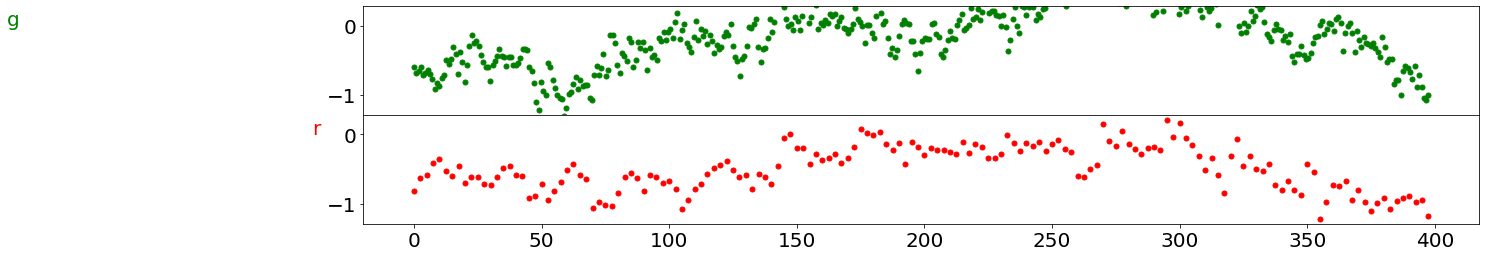

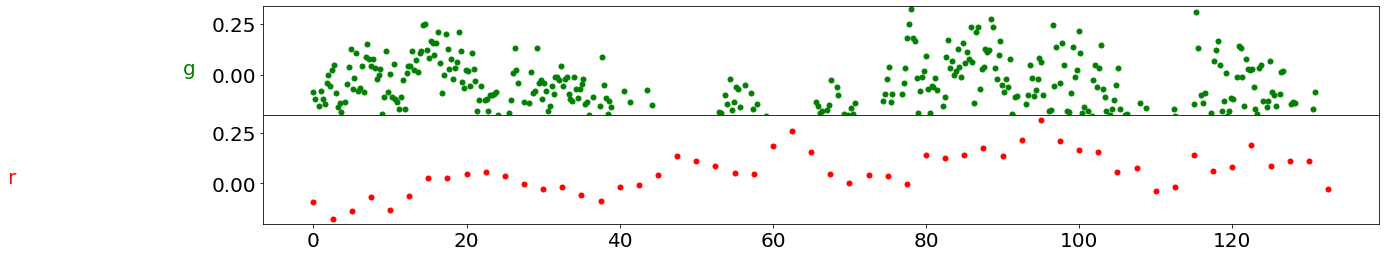

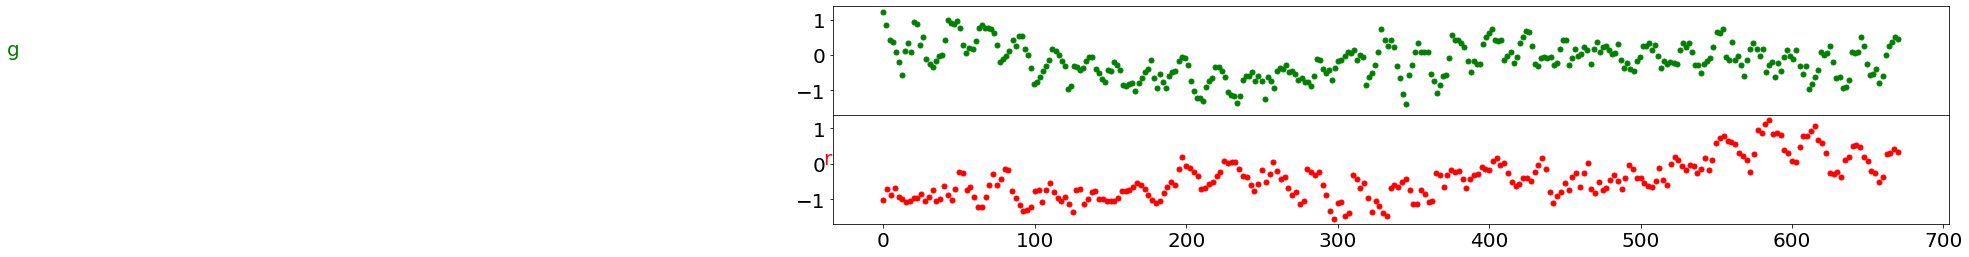

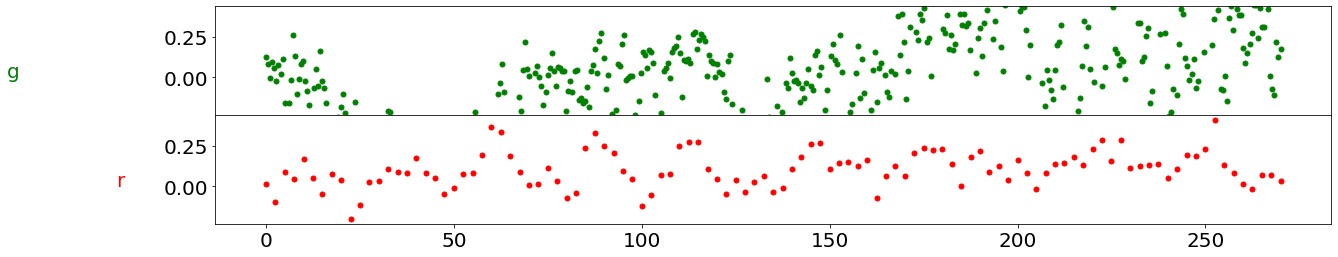

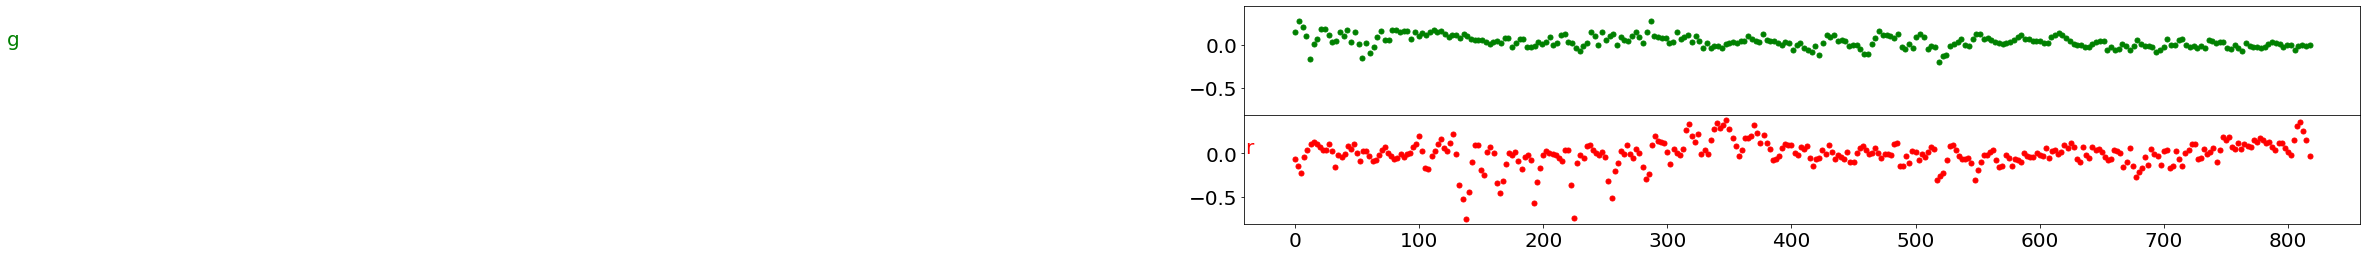

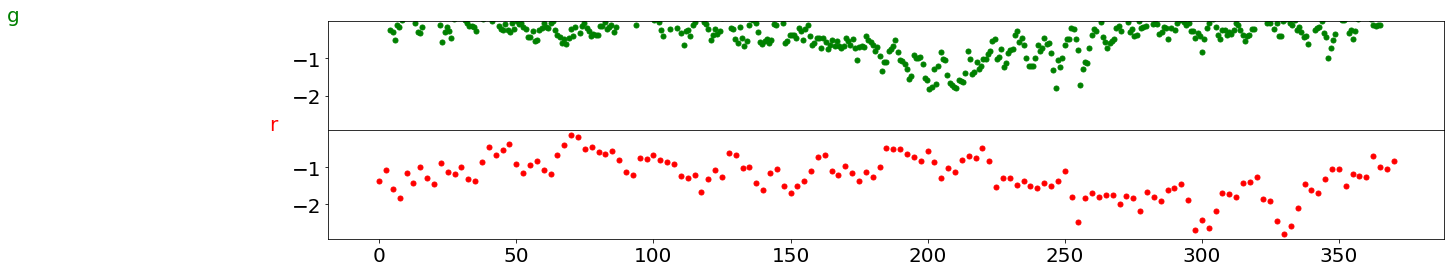

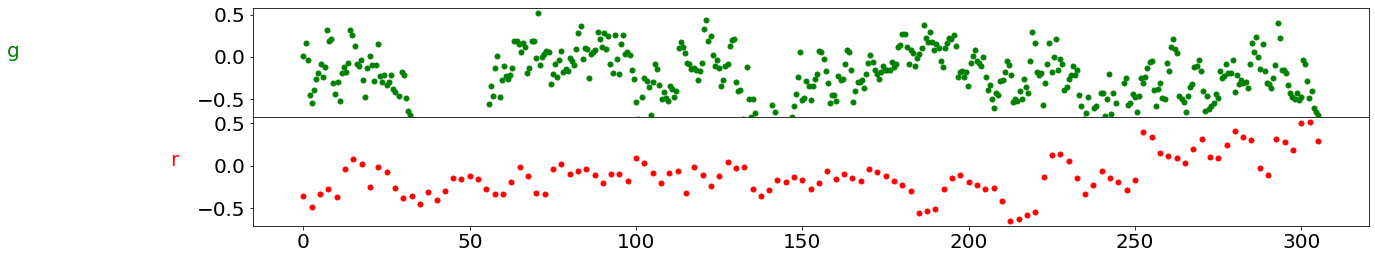

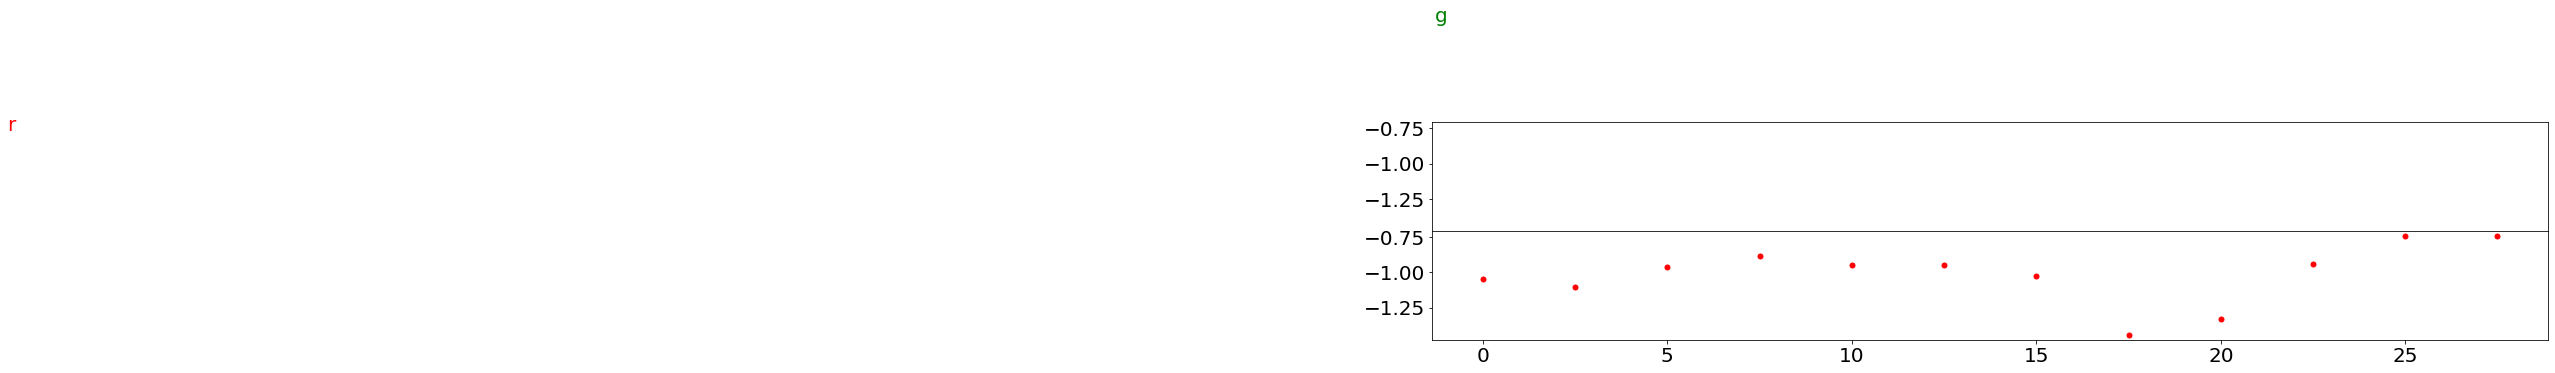

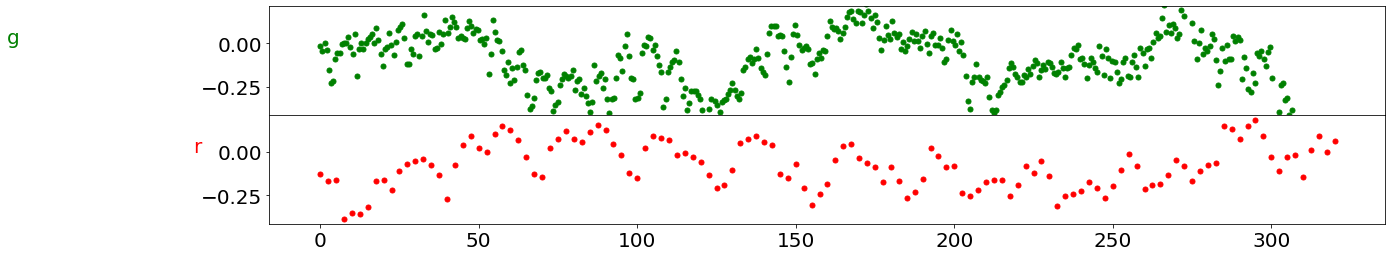

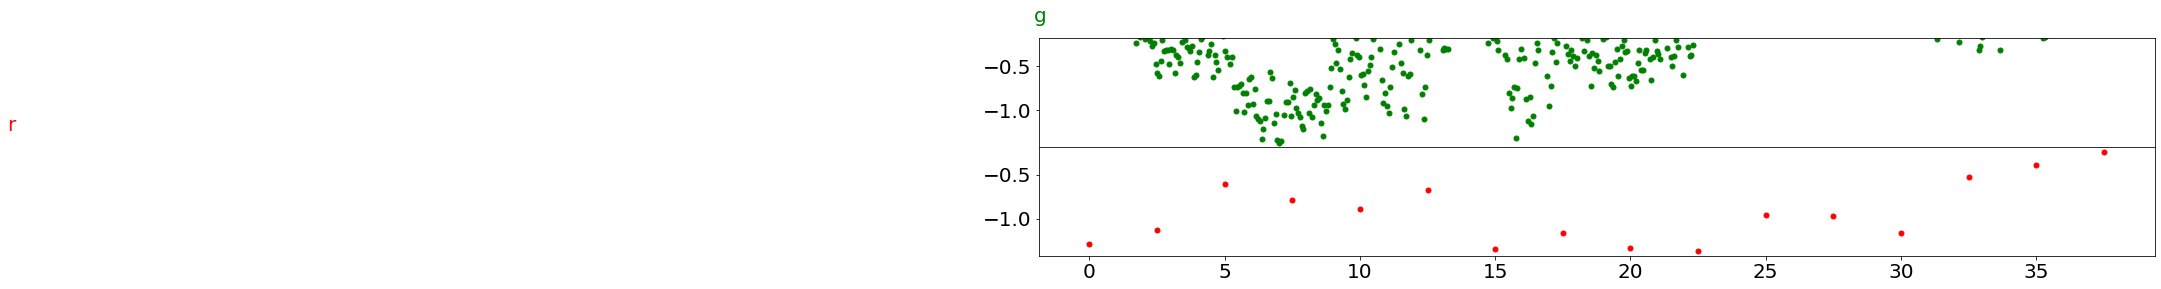

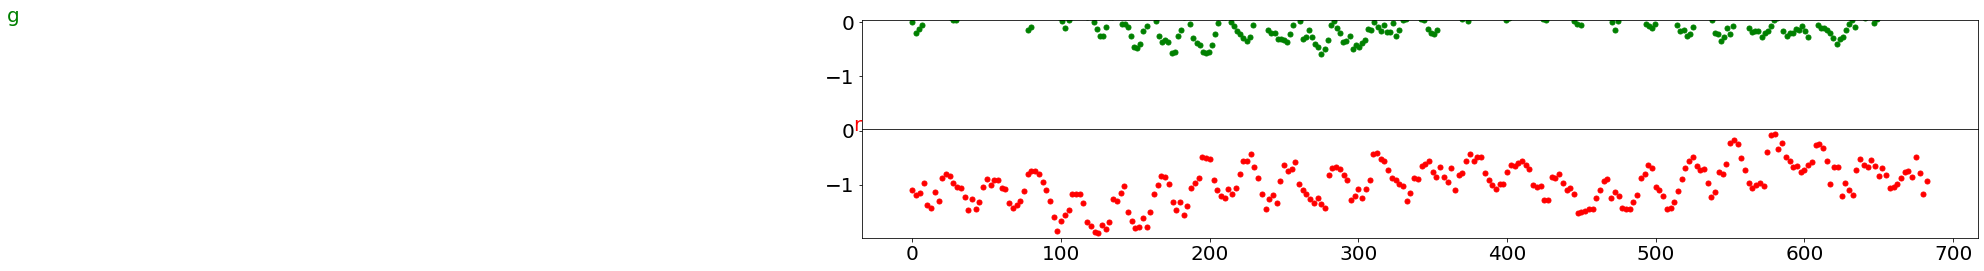

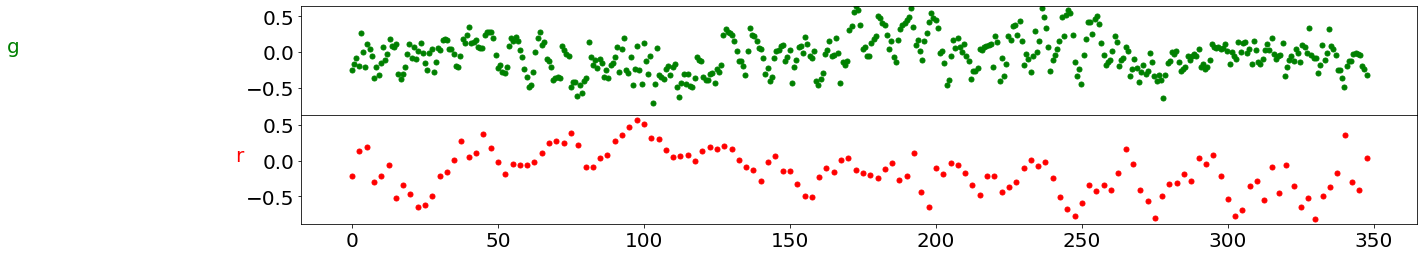

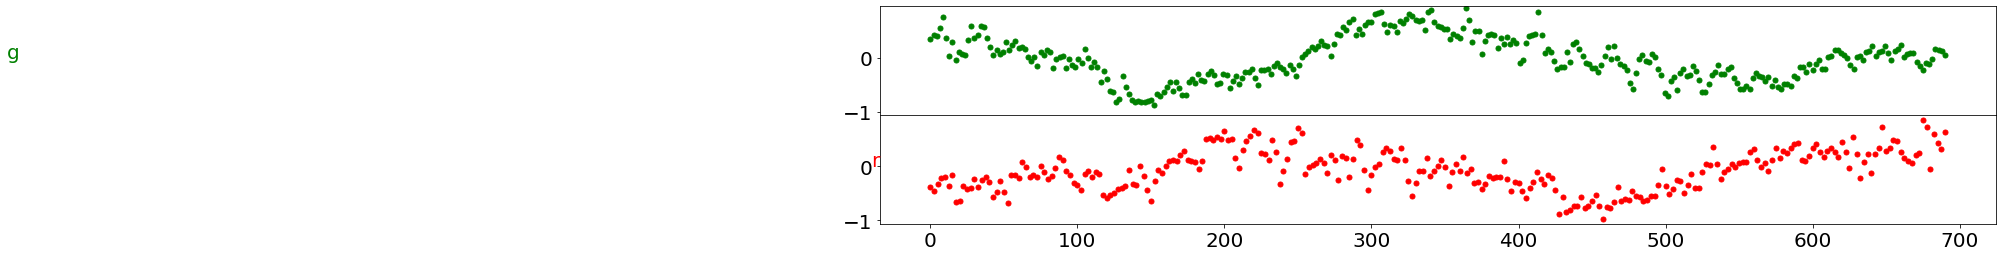

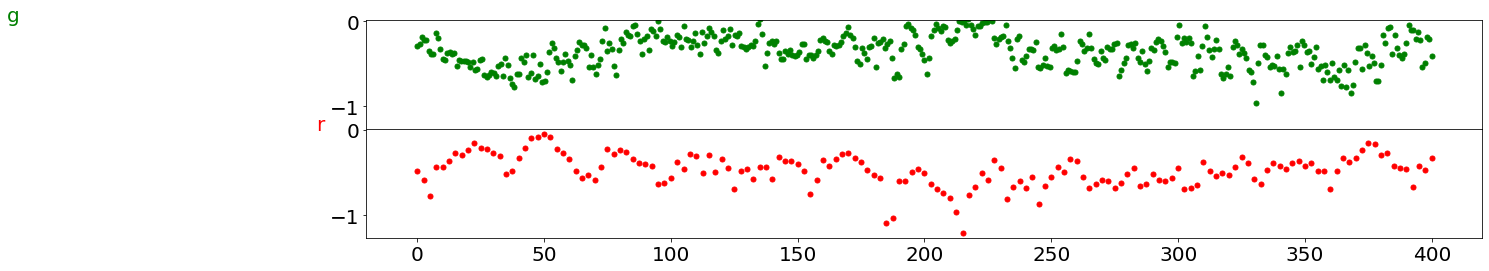

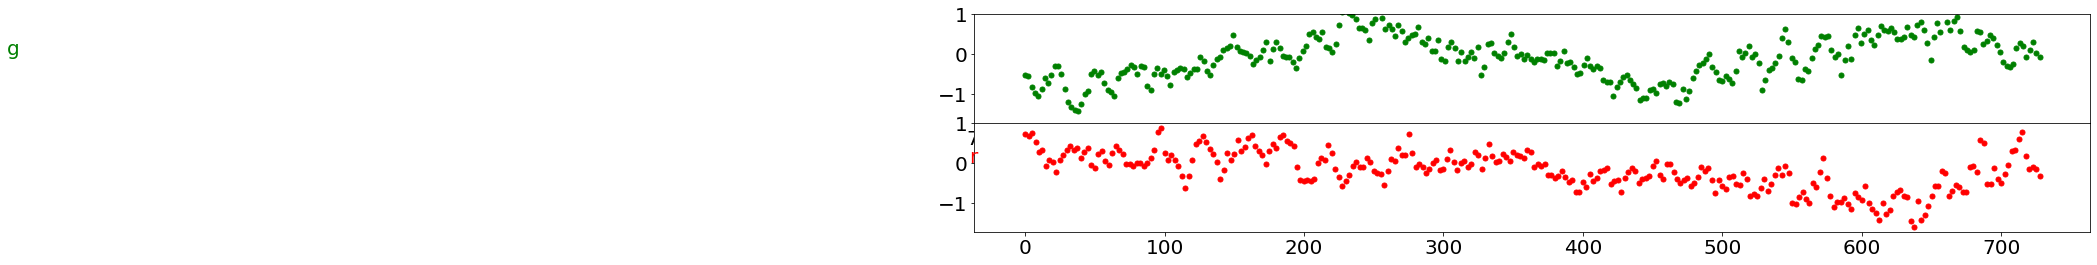

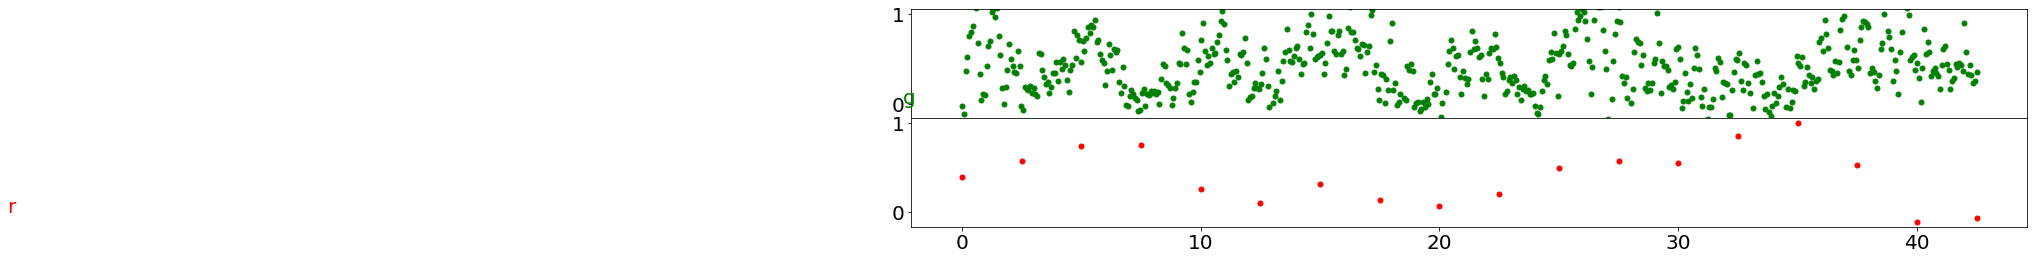

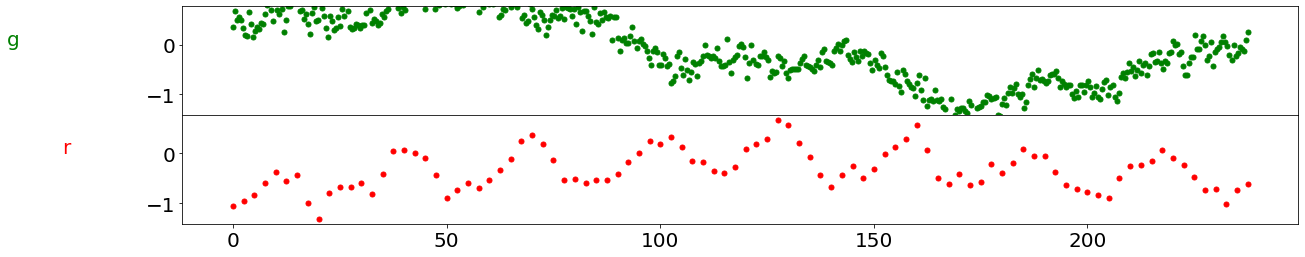

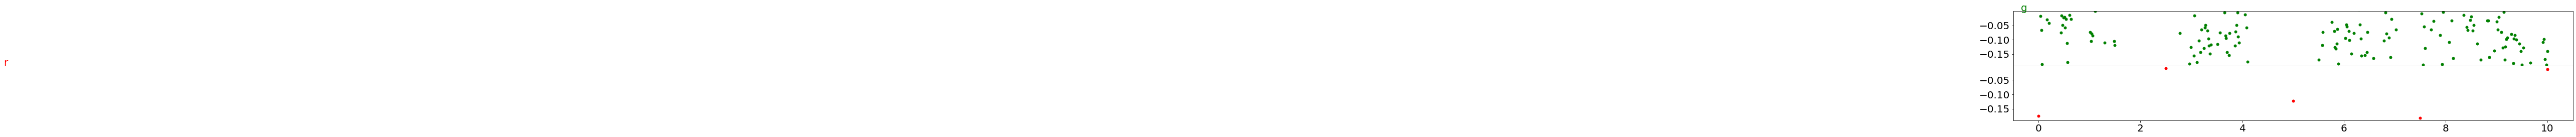

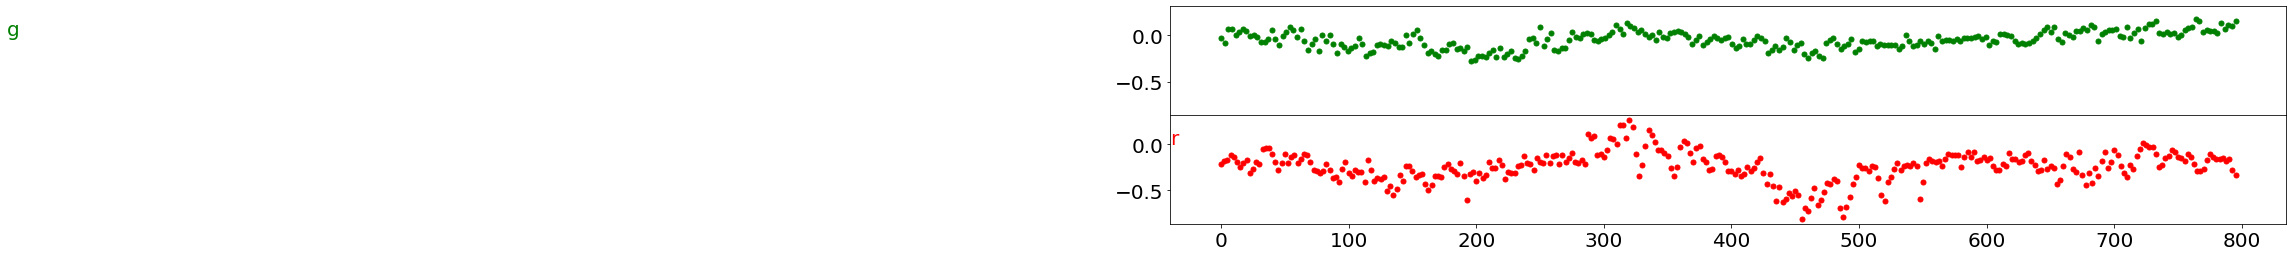

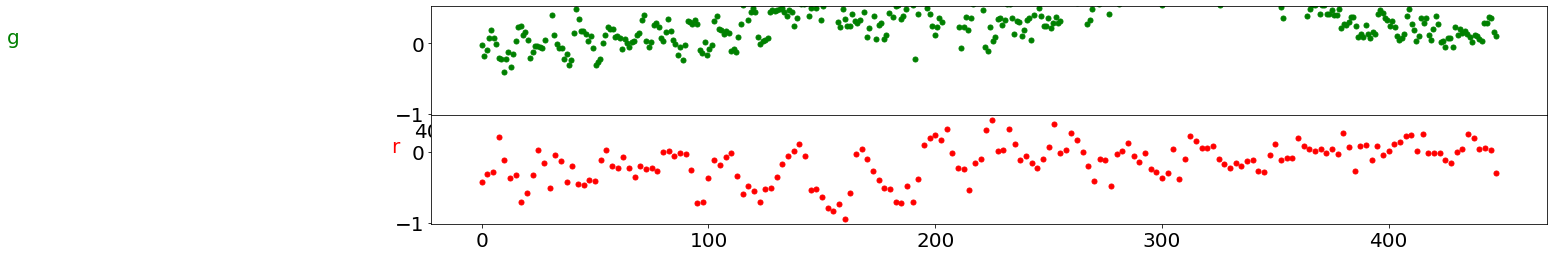

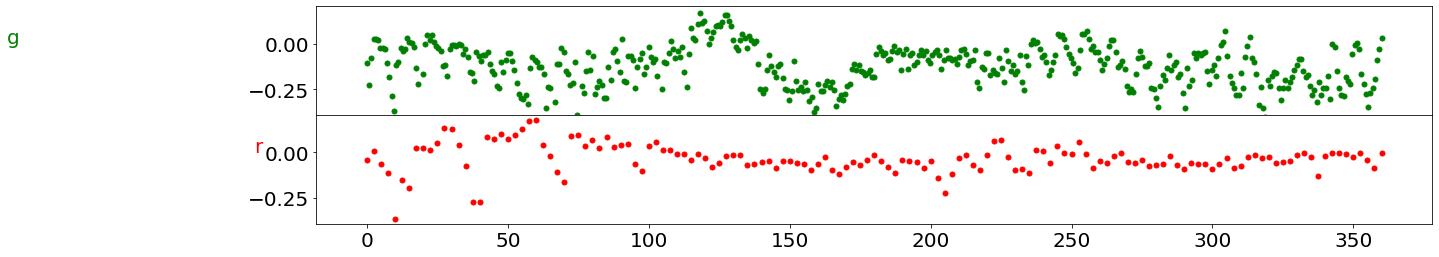

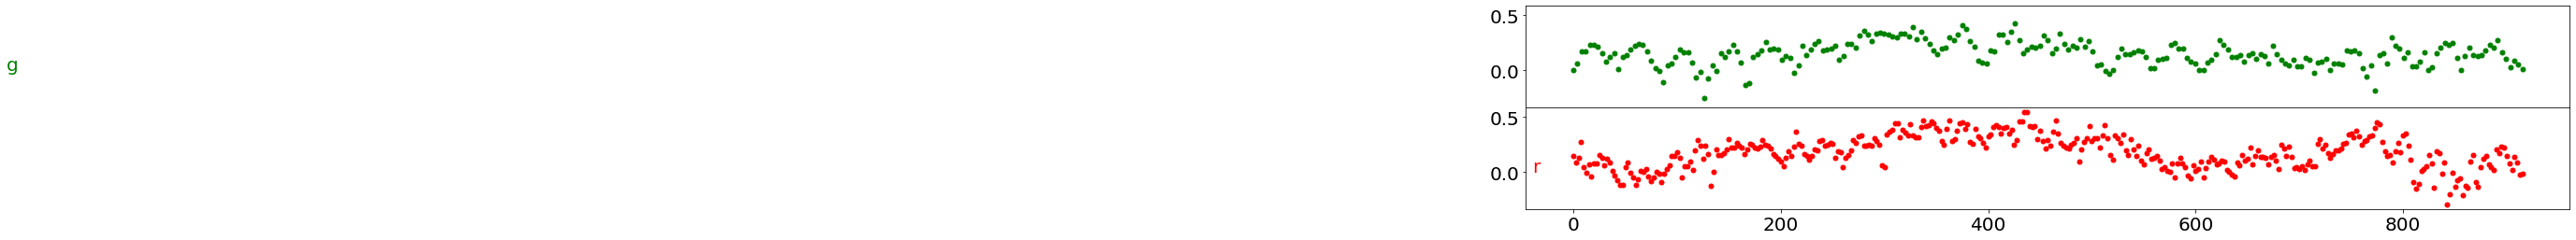

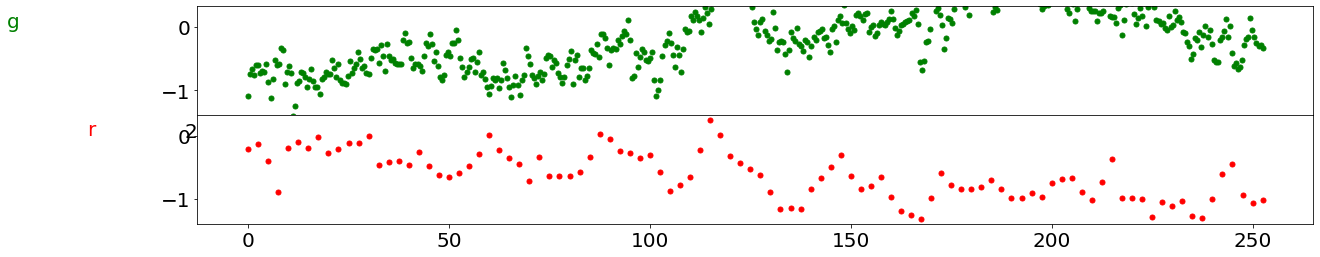

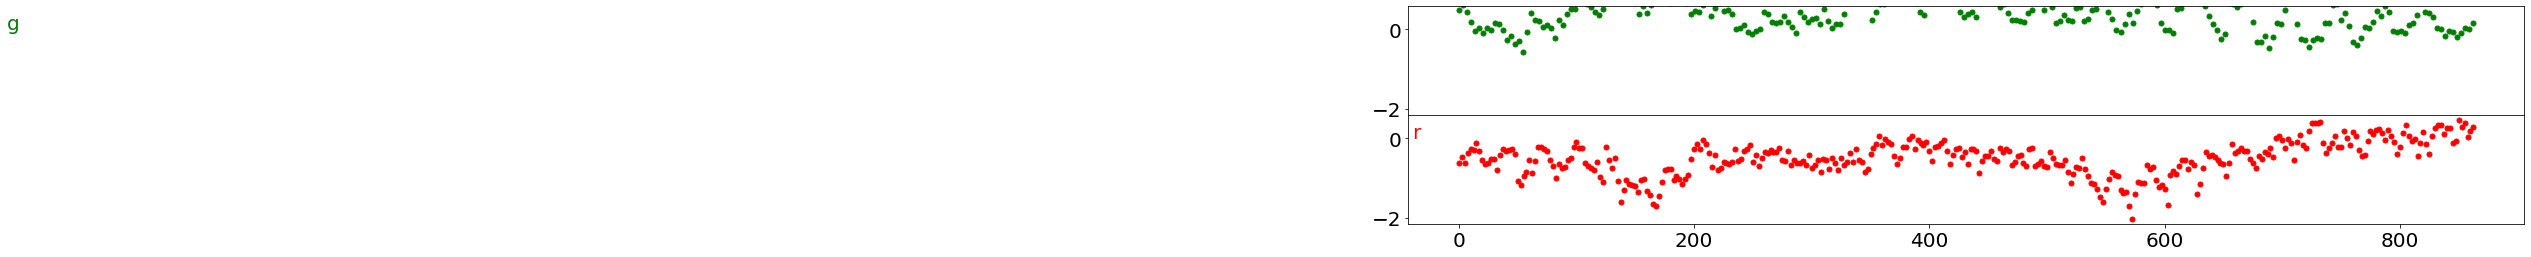

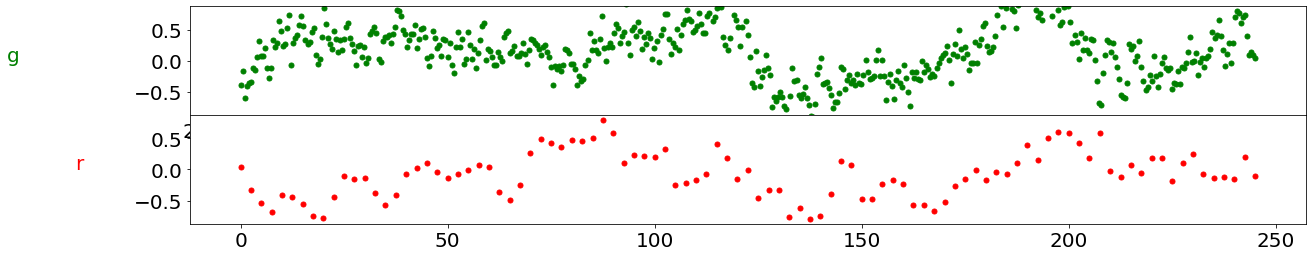

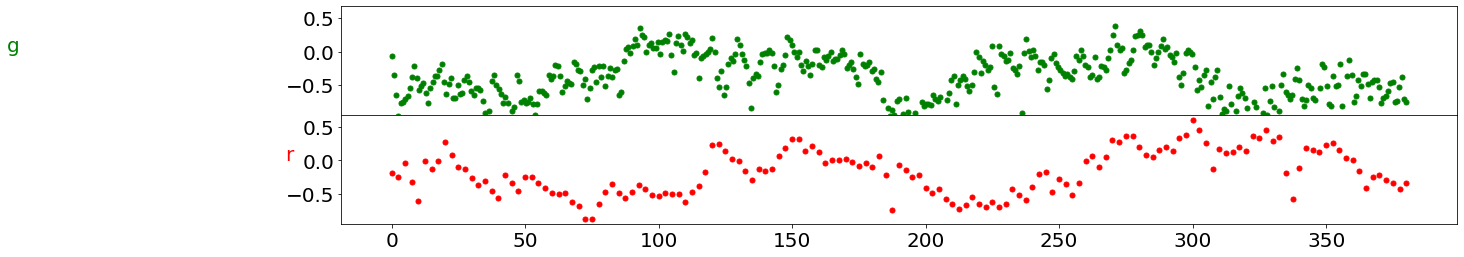

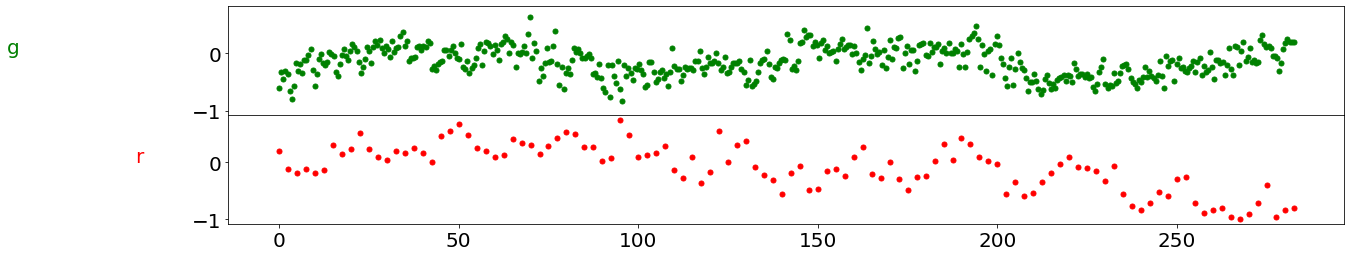

In [273]:
for i in range(num_sims):
    ex = int(np.random.uniform(0,1)*len(lcs.dataset))
    #target_tp = np.union1d(lcs.dataset[ex,0,:,0], lcs.dataset[ex,1,:,0])
    target_tp1_i = lcs.dataset[ex,0,:,1] > 0
    target_tp2_i = lcs.dataset[ex,1,:,1] > 0
    target_tp1 = lcs.dataset[ex,0,target_tp1_i,0]
    target_tp2 = lcs.dataset[ex,1,target_tp2_i,0]
    target_tp = np.concatenate((target_tp1,target_tp2),axis=0) # reallllllllll
    target_tp = np.arange(0,1500,step=2.5, dtype=np.float32) # uniform timepoints 
    target_tp = target_tp[np.newaxis].repeat(2,axis=0)[np.newaxis]
    z = np.random.randn(1,args.num_ref_points, args.latent_dim)
    intrp = utils.decode(net, zs=z, disc_path=z, target_x=target_tp)
    rx = intrp[0,0,:len(target_tp1),0]
    ry = intrp[0,0,:len(target_tp1),1]
    gx = intrp[0,1,len(target_tp1):,0]
    gy = intrp[0,1,len(target_tp1):,1]
    fig,ax = plt.subplots(2)
    ax[0].scatter(gx,gy,c='g')
    ax[1].scatter(rx,ry,c='r')
    ymin,ymax = ax[1].get_ylim()
    ax[0].text(-40,0,'g',c='g',fontsize=20)
    ax[0].set_ylim(ymin,ymax)
    ax[1].text(-40,0,'r',c='r',fontsize=20)
    plt.subplots_adjust(wspace=0, hspace=0) 
    plt.savefig(f'../img/generate/gr_uniftp/{i}')